In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random

Set font sizes and plot style

In [12]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

In [13]:
# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1\\')
PATH = os.getcwd()
SAVE_PATH = PATH+'Group_Figures\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Control.txt", "r") as pull_file:
    analysis_pull_list_control = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Task.txt", "r") as pull_file:
    analysis_pull_list_task = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'

In [14]:
#%% Plot properties
box_lw = 2.5 #box linewidth
boxwidth = .07 #box width
whisker_lw = 2.0 #whisker linewidth
circle_size = 8 

tp3_title = "1000,50"
tp4_title = "1000,150"
tp5_title = '1100,50'
tp6_title = "1100,150"
tp7_title = "1200,50"
tp8_title = '1200,150'
tp9_title = '1300,100'
tp10_title = '1300,200'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]

box_color1 = wheel.seth_red
box_color2 = wheel.seth_blue
box_color3 = '0.4'
#boxprops
two_props = {"facecolor": "none", "edgecolor" : box_color1, "linewidth": box_lw, "alpha": 1}
three_props = {"facecolor": "none", "edgecolor" : box_color2, "linewidth": box_lw, "alpha": 1}
four_props = {"facecolor": "none", "edgecolor" : box_color3, "linewidth": box_lw, "alpha": 1}
#whiskerprops
two_whisk = {"linewidth" : whisker_lw, "color": box_color1}
three_whisk = {"linewidth" : whisker_lw, "color": box_color2}
four_whisk = {"linewidth" : whisker_lw, "color": box_color3}
#capprops
two_cap = {"linewidth" : whisker_lw, "color": box_color1}
three_cap = {"linewidth" : whisker_lw, "color": box_color2}
four_cap = {"linewidth" : whisker_lw, "color": box_color3}
#medianprops
two_median = {"linewidth" : whisker_lw, "color": box_color1}     
three_median = {"linewidth" : whisker_lw, "color": box_color2}   
four_median = {"linewidth" : whisker_lw, "color": box_color3}        
    
#total_indecisions = np.concatenate((perc_player_indecisions,perc_indecisions_R))
props = [{}, {}, {}, {}, {}, {}]
props_dict = {}
box_color = 'grey'
dot_color = 'black'   

### Functions

In [15]:
#%% Box plot with option to make double boxplot
def boxplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.boxplot(filtered_data, positions=box_xlocs, patch_artist=True, boxprops = props[0], whiskerprops = props[1], 
                capprops = props[2], medianprops = props[3], showfliers=False, widths = (box_widths)*len(xlocs))
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.seth_red, wheel.seth_blue]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 12)

In [16]:
def jitter(xlocs, data):
    if data.ndim >1:
        xlocs = np.tile(xlocs,(np.shape(data)[0],1))
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    else:
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    return xlocs

In [17]:
#%% Box plot with option to make double boxplot
def violinplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.violinplot(filtered_data, positions=box_xlocs)
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.dark_blue,wheel.dark_red]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 12)


In [18]:
#%% Scatter plot, two separate data sets on same plot
def two_data_scatter_correlation(data1a, data1b, data2a, data2b, 
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    # =============================================================================
    #     Calculate Linear model
    # =============================================================================
    # Combine the two groups ------------------------------------------------
    all_data_a = np.concatenate((data1a,data2a))
    all_data_a = all_data_a.flatten()
    all_data_b = np.concatenate((data1b,data2b))
    all_data_b = all_data_b.flatten()
    
    # Linear model ---------------------------------------------------------------
    
    print(all_data_a)
    print()
    print(all_data_b)
    lm = stats.linregress(all_data_a,all_data_b)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(all_data_a, all_data_b)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.scatter(data2a, data2b, c = color2)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(ax, labels, colors, fontsize = 12)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+SAVE_PATH+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

In [19]:
#%% Scatter plot, one data set 
def one_data_scatter_correlation(data1a, data1b,
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    data1_f = data1a.flatten()
    data2_f= data1b.flatten()
    lm = stats.linregress(data1_f,data2_f)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(data1_f, data2_f)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(ax, labels, colors, fontsize = 12)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+SAVE_PATH+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

### Pickle

Pickle Load Control Tasks


In [20]:
coincidence_trials = 50
reaction_trials = 50
interval_trials = 50
# ---------------Controls-------------------------
player_reaction_decision_array = np.empty((num_subjects, reaction_trials))
agent_reaction_decision_array = np.empty((num_subjects, reaction_trials))
reaction_time = np.zeros([num_subjects,reaction_trials])*np.nan 
reaction_movement_time = np.zeros([num_subjects,reaction_trials])*np.nan
reaction_trial_start = np.zeros((num_subjects,reaction_trials))*np.nan 
coincidence_trial_start = np.zeros((num_subjects, coincidence_trials))*np.nan
coincidence_reach_time = np.zeros((num_subjects, coincidence_trials))*np.nan
interval_trial_start = np.zeros((num_subjects, interval_trials))*np.nan
interval_reach_time = np.zeros((num_subjects, interval_trials))*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_time.pkl', 'rb'))
    reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_reaction_movement_time.pkl', 'rb'))
    player_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_decision_array.pkl', 'rb'))
    agent_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_agent_reaction_decision_time.pkl', 'rb'))
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    interval_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_interval_trial_start.pkl', 'rb'))
    interval_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_interval_reach_time.pkl', 'rb'))
    coincidence_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_coincidence_trial_start.pkl', 'rb'))
    coincidence_reach_time[i,:] =  pickle.load(open(data_path + f'{subname}_coincidence_reach_time.pkl', 'rb'))

Pickle Load Task and Washout

In [21]:
path1 = PATH+'\\'+'Sub1_Task'
task_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
task_df = task_df.loc[task_df['Condition type']==3] # Only get the task condition 
num_trials = int(task_df.iloc[-1]['Block_Step']) # number of trials in each block
num_blocks = int(task_df.iloc[-1]['Block_Row']/2)
tot_trials = int(num_trials*num_blocks)
trial_time = int(task_df.iloc[0]['Condition time'])
task_df_columns = len(fields_pull)
trial_table = np.empty((num_subjects, tot_trials, 4), int)
#----------------- TASK--------------------------------
player_task_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_task_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_task_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan
player_task_movement_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan
agent_task_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
agent_task_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
agent_task_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan

# -------------- Washout-------------------
washout_trials = 25
player_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
player_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    #task_data[i,:,:,:,:] = pickle.load(open(data_path + f'{subname}_task_data.pkl', 'rb'))
    player_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_time.pkl', 'rb'))
    player_task_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_array.pkl', 'rb'))
    player_task_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_task_movement_time.pkl', 'rb'))
    player_task_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_reach_time.pkl', 'rb'))
    agent_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_task_decision_time.pkl', 'rb'))
    agent_task_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_decision_array.pkl', 'rb'))
    agent_task_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_reach_time.pkl', 'rb'))
    player_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_time.pkl', 'rb'))
    player_washout_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_array.pkl', 'rb'))
    player_washout_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_washout_movement_time.pkl', 'rb'))
    player_washout_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_reach_time.pkl', 'rb'))
    agent_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_washout_decision_time.pkl', 'rb'))
    agent_washout_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_decision_array.pkl', 'rb'))
    agent_washout_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_reach_time.pkl', 'rb'))

### Calculations

#### Calculations (Control)

Reaction and Reaction Movement Time

In [22]:
#%% Calculate RT means and sds
reaction_time = np.where(reaction_time<200,np.nan,reaction_time) # Anytime someone reacted under 200 ms, replace with nan
reaction_plus_movement_time = reaction_time + reaction_movement_time
reaction_plus_movement_time_mean = np.nanmean(reaction_plus_movement_time, axis = 1)
reaction_plus_movement_time_sd = np.nanstd(reaction_plus_movement_time,axis=1)
reaction_movement_time_mean = np.nanmean(reaction_movement_time[:,10:], axis = 1)
reaction_movement_time_sd = np.nanstd(reaction_movement_time[:,10:], axis = 1)
reaction_time_mean = np.nanmean(reaction_time[:,10:], axis = 1)
reaction_time_sd = np.nanstd(reaction_time[:,10:], axis = 1)

Coincidence Timing

In [23]:
coincidence_reach_time_mean = np.nanmean(coincidence_reach_time[:,10:], axis=1)
coincidence_reach_time_sd =  np.nanstd(coincidence_reach_time[:,10:], axis=1)

Interval Timing

In [24]:
interval_reach_time_mean = np.nanmean(interval_reach_time[:,10:], axis=1)
interval_reach_time_sd =  np.nanstd(interval_reach_time[:,10:], axis=1)

#### Calculations (TASK)

Indecisions, Wins, Incorrects

In [25]:
# Win, Loss, Indecision counts
agent_task_decision_array = np.where(agent_task_decision_array == 2,-1,agent_task_decision_array) # Make sure agent_task_decision_array replaces 2 with -1 from the first pilot
player_indecisions = np.zeros((num_subjects, num_blocks))
player_wins = np.zeros((num_subjects, num_blocks))
player_incorrects = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions[i,j] = np.count_nonzero(player_task_decision_array[i,j,:] == 0)
        player_wins[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == -1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 0))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 0))
        player_incorrects[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == -1))
        player_incorrects[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 1))
perc_player_indecisions = (player_indecisions / num_trials)*100
perc_player_wins = (player_wins / num_trials)*100
perc_player_incorrects = (player_incorrects/num_trials)*100

Experiment reach and decision times

In [26]:
# Actual trials
agent_mean_reach_time = np.nanmean(agent_task_reach_time,axis = 2)
agent_median_reach_time = np.nanmedian(agent_task_reach_time,axis = 2)
agent_sd_reach_time = np.nanstd(agent_task_reach_time,axis = 2)
agent_mean_decision_time = np.nanmean(agent_task_decision_time, axis =2)
agent_median_decision_time = np.nanmedian(agent_task_decision_time, axis =2)
agent_sd_decision_time = np.nanstd(agent_task_decision_time, axis =2)
player_mean_reach_time = np.nanmean(player_task_reach_time,axis=2)
player_median_reach_time = np.nanmedian(player_task_reach_time,axis=2)
player_sd_reach_time = np.nanstd(player_task_reach_time,axis=2)
player_mean_decision_time = np.nanmean(player_task_decision_time,axis=2)
player_median_decision_time = np.nanmedian(player_task_decision_time,axis=2)
player_sd_decision_time = np.nanstd(agent_task_reach_time,axis = 2)

Reach Times on Indecisions

In [27]:
#%% Find agent reach times for player indecisions
agent_task_decision_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
player_task_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
player_left_time_on_indecisions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_mean_left_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
indecision_index = np.argwhere(player_task_reach_time>1500)

c=0
for i,j,k in indecision_index:
    agent_task_decision_time_on_indecisions[i,j,k] = agent_task_decision_time[i,j,k]
    player_task_reach_time_on_indecisions[i,j,k] = player_task_reach_time[i,j,k]
    player_left_time_on_indecisions[i,j,k] = player_task_decision_time[i,j,k]
    c+=1

agent_mean_reach_time_on_indecisions = np.nanmean(agent_task_decision_time_on_indecisions,axis=2)
player_mean_reach_time_on_indecisions = np.nanmean(player_task_reach_time_on_indecisions,axis=2)
player_mean_left_time_on_indecisions = np.nanmean(player_left_time_on_indecisions,axis=2)



Gamble and reaction calculations

In [28]:

# Gamble arrays
gamble_decision_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
gamble_reach_target_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_task_reach_time_gambles = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_task_decision_time_gambles = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
# Reaction arrays
reaction_decision_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
reaction_reach_target_time = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_task_reach_time_reactions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan
agent_task_decision_time_reactions = np.zeros((num_subjects,num_blocks,num_trials))*np.nan

# Wins, indecisiosn, incorrects arrays
gamble_wins = np.zeros((num_subjects, num_blocks))
perc_gamble_wins = np.zeros((num_subjects, num_blocks))
gamble_indecisions = np.zeros((num_subjects, num_blocks))
perc_gamble_indecisions = np.zeros((num_subjects, num_blocks))
gamble_incorrects = np.zeros((num_subjects, num_blocks))
perc_gamble_incorrects = np.zeros((num_subjects, num_blocks))
reaction_wins = np.zeros((num_subjects, num_blocks))
perc_reaction_wins = np.zeros((num_subjects, num_blocks))
reaction_indecisions = np.zeros((num_subjects, num_blocks))
perc_reaction_indecisions = np.zeros((num_subjects, num_blocks))
reaction_incorrects = np.zeros((num_subjects, num_blocks))
perc_reaction_incorrects = np.zeros((num_subjects, num_blocks))
total_gambles = np.zeros((num_subjects,num_blocks))
total_reactions = np.zeros((num_subjects,num_blocks))
total_did_not_leave = np.zeros((num_subjects,num_blocks))

for i in range(num_subjects): # Need this for loop for reaction time i think... maybe not but whatever it works
    REACTION_TIME =  reaction_time_mean[i] - reaction_time_sd[i]
    gamble_index = np.argwhere((player_task_decision_time[i,:,:]-agent_task_decision_time[i,:,:])<=REACTION_TIME)
    reaction_index = np.argwhere((player_task_decision_time[i,:,:]-agent_task_decision_time[i,:,:])>REACTION_TIME)
    did_not_leave_start_index = np.argwhere(np.isnan(player_task_decision_time[i,:,:]))
    print(np.shape(gamble_index))
    print(np.shape(reaction_index))
    for j,k in gamble_index:
        gamble_decision_time[i,j,k] = player_task_decision_time[i,j,k]
        gamble_reach_target_time[i,j,k] = player_task_reach_time[i,j,k]
        agent_task_reach_time_gambles[i,j,k] = agent_task_reach_time[i,j,k]
        agent_task_decision_time_gambles[i,j,k] = agent_task_decision_time[i,j,k]
        # Calculate gamble wins
        if player_task_decision_array[i,j,k] == 1 and (agent_task_decision_array[i,j,k] == 1 or agent_task_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == -1 and (agent_task_decision_array[i,j,k] == -1 or agent_task_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == 0:
            gamble_indecisions[i,j] += 1
        elif player_task_decision_array[i,j,k]*agent_task_decision_array[i,j,k] == -1:
            gamble_incorrects[i,j] += 1
        else:
            print('none')
        total_gambles[i,j]+=1
    for j,k in reaction_index:
        reaction_decision_time[i,j,k] = player_task_decision_time[i,j,k]
        reaction_reach_target_time[i,j,k] = player_task_reach_time[i,j,k]
        agent_task_reach_time_reactions[i,j,k] = agent_task_reach_time[i,j,k]
        agent_task_decision_time_reactions[i,j,k] = agent_task_decision_time[i,j,k]
        # Calculate reaction wins
        if player_task_decision_array[i,j,k] == 1 and (agent_task_decision_array[i,j,k] == 1 or agent_task_decision_array[i,j,k] == 0):
            reaction_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == -1 and (agent_task_decision_array[i,j,k] == -1 or agent_task_decision_array[i,j,k] == 0):
            reaction_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == 0:
            reaction_indecisions[i,j] += 1
        elif player_task_decision_array[i,j,k]*agent_task_decision_array[i,j,k] == -1:
            reaction_incorrects[i,j] += 1
        else:
            print('none')
        total_reactions[i,j]+=1
            
    for j,k in did_not_leave_start_index:
        reaction_indecisions[i,j]+=1
        total_did_not_leave[i,j]+=1
perc_reactions = total_reactions/num_trials*100
perc_reaction_wins = reaction_wins/total_reactions*100 # Array division
perc_reaction_incorrects = reaction_incorrects/total_reactions*100
perc_reaction_indecisions = reaction_indecisions/total_reactions*100

perc_gambles = total_gambles/num_trials*100
perc_gamble_wins = gamble_wins/total_gambles*100
perc_gamble_incorrects = gamble_incorrects/total_gambles*100
perc_gamble_indecisions = gamble_indecisions/total_gambles*100

perc_wins_that_were_gambles = gamble_wins/player_wins *100
perc_indecisions_that_were_gambles = gamble_indecisions/player_indecisions*100
perc_incorrects_that_were_gambles = gamble_indecisions/player_incorrects*100

perc_wins_that_were_reactions = reaction_wins/player_wins*100
perc_indecisions_that_were_reactions = reaction_indecisions/player_indecisions*100
perc_incorrects_that_were_reactions = reaction_indecisions/player_incorrects*100


# get means
gamble_decision_time_means = np.nanmean(gamble_decision_time, axis =2 )
reaction_decision_time_means = np.nanmean(reaction_decision_time, axis =2 )
agent_task_decision_time_gamble_means = np.nanmean(agent_task_decision_time_gambles, axis = 2)
agent_task_decision_time_reaction_means = np.nanmean(agent_task_decision_time_reactions, axis = 2)


for i in range(num_subjects):
    for j in range(num_blocks):
        if total_reactions[i,j]<10:
            perc_reaction_wins[i,j] = np.nan
            perc_reaction_incorrects[i,j] = np.nan
            perc_reaction_indecisions[i,j] = np.nan
            reaction_decision_time_means[i,j] = np.nan

        if total_gambles[i,j]<10:
            perc_gamble_wins[i,j] = np.nan
            perc_gamble_incorrects[i,j] = np.nan
            perc_gamble_indecisions[i,j] = np.nan
            gamble_decision_time_means[i,j] = np.nan

(472, 2)
(8, 2)
(430, 2)
(46, 2)
(416, 2)
(51, 2)
(303, 2)
(177, 2)


C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_31576\1215188090.py:75: RuntimeWarning: invalid value encountered in true_divide
  perc_reaction_wins = reaction_wins/total_reactions*100 # Array division
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_31576\1215188090.py:76: RuntimeWarning: invalid value encountered in true_divide
  perc_reaction_incorrects = reaction_incorrects/total_reactions*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_31576\1215188090.py:77: RuntimeWarning: divide by zero encountered in true_divide
  perc_reaction_indecisions = reaction_indecisions/total_reactions*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_31576\1215188090.py:77: RuntimeWarning: invalid value encountered in true_divide
  perc_reaction_indecisions = reaction_indecisions/total_reactions*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_31576\1215188090.py:86: RuntimeWarning: divide by zero encountered in true_divide
  perc_incorrects_that_were_gambles = gamble_ind

Wins when both decide

In [29]:
# Get agent decision array
agent_decision_array = np.zeros((num_subjects,num_blocks,num_trials))
player_both_reached_wins = np.zeros((num_subjects, num_blocks))
perc_player_both_reached_wins = np.zeros((num_subjects, num_blocks))
agent_both_reached_wins = np.zeros((num_subjects, num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_task_reach_time[i,j,k]>1500:
                agent_decision_array[i,j,k] = 0
            else:
                agent_decision_array[i,j,k] = agent_task_decision_array[i,j,k]
# Get wins when both decide
both_decide_index = np.argwhere(np.logical_and(player_task_decision_array!=0,agent_decision_array!=0))

for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_decision_array[i,j,k]*player_task_decision_array[i,j,k] == 1:
                player_both_reached_wins[i,j]+=1
            if agent_decision_array[i,j,k]*player_task_decision_array[i,j,k] == -1:
                agent_both_reached_wins[i,j]+=1
        x = np.count_nonzero(player_task_decision_array[i,j,:]!=0)
        y = np.count_nonzero(agent_decision_array[i,j,:]!=0)
        if x!= 0 and y!= 0:
            total = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:]!=0,agent_decision_array[i,j,:]!=0))
            perc_player_both_reached_wins[i,j] = (player_both_reached_wins[i,j]/total)*100



Concatenate to get all subjects across each condition 

In [30]:

temp = np.swapaxes(player_task_decision_time, 0, 1) # swap axes so reshape keeps each subject together in the row
all_player_task_decision_times_each_condition = np.reshape(temp,(num_blocks,-1))
temp = np.swapaxes(player_task_reach_time, 0, 1)
all_player_task_reach_times_each_condition = np.reshape(temp,(num_blocks,-1))

temp = np.swapaxes(agent_task_decision_time, 0, 1)
all_agent_task_decision_times_each_condition = np.reshape(temp,(num_blocks,-1))
all_agent_task_reach_times_each_condition = all_agent_task_decision_times_each_condition + 150
all_player_mean_decision_time_each_condition = np.nanmean(all_player_task_decision_times_each_condition, axis = 1)
all_player_mean_reach_time_each_condition = np.nanmean(all_player_task_reach_times_each_condition, axis = 1)
all_agent_mean_decision_time_each_condition = np.nanmean(all_agent_task_decision_times_each_condition, axis = 1)
all_agent_mean_reach_time_each_condition = np.nanmean(all_agent_task_reach_times_each_condition, axis = 1)

#### Calculations (Washout)

### Plots

Decision Time Distributions

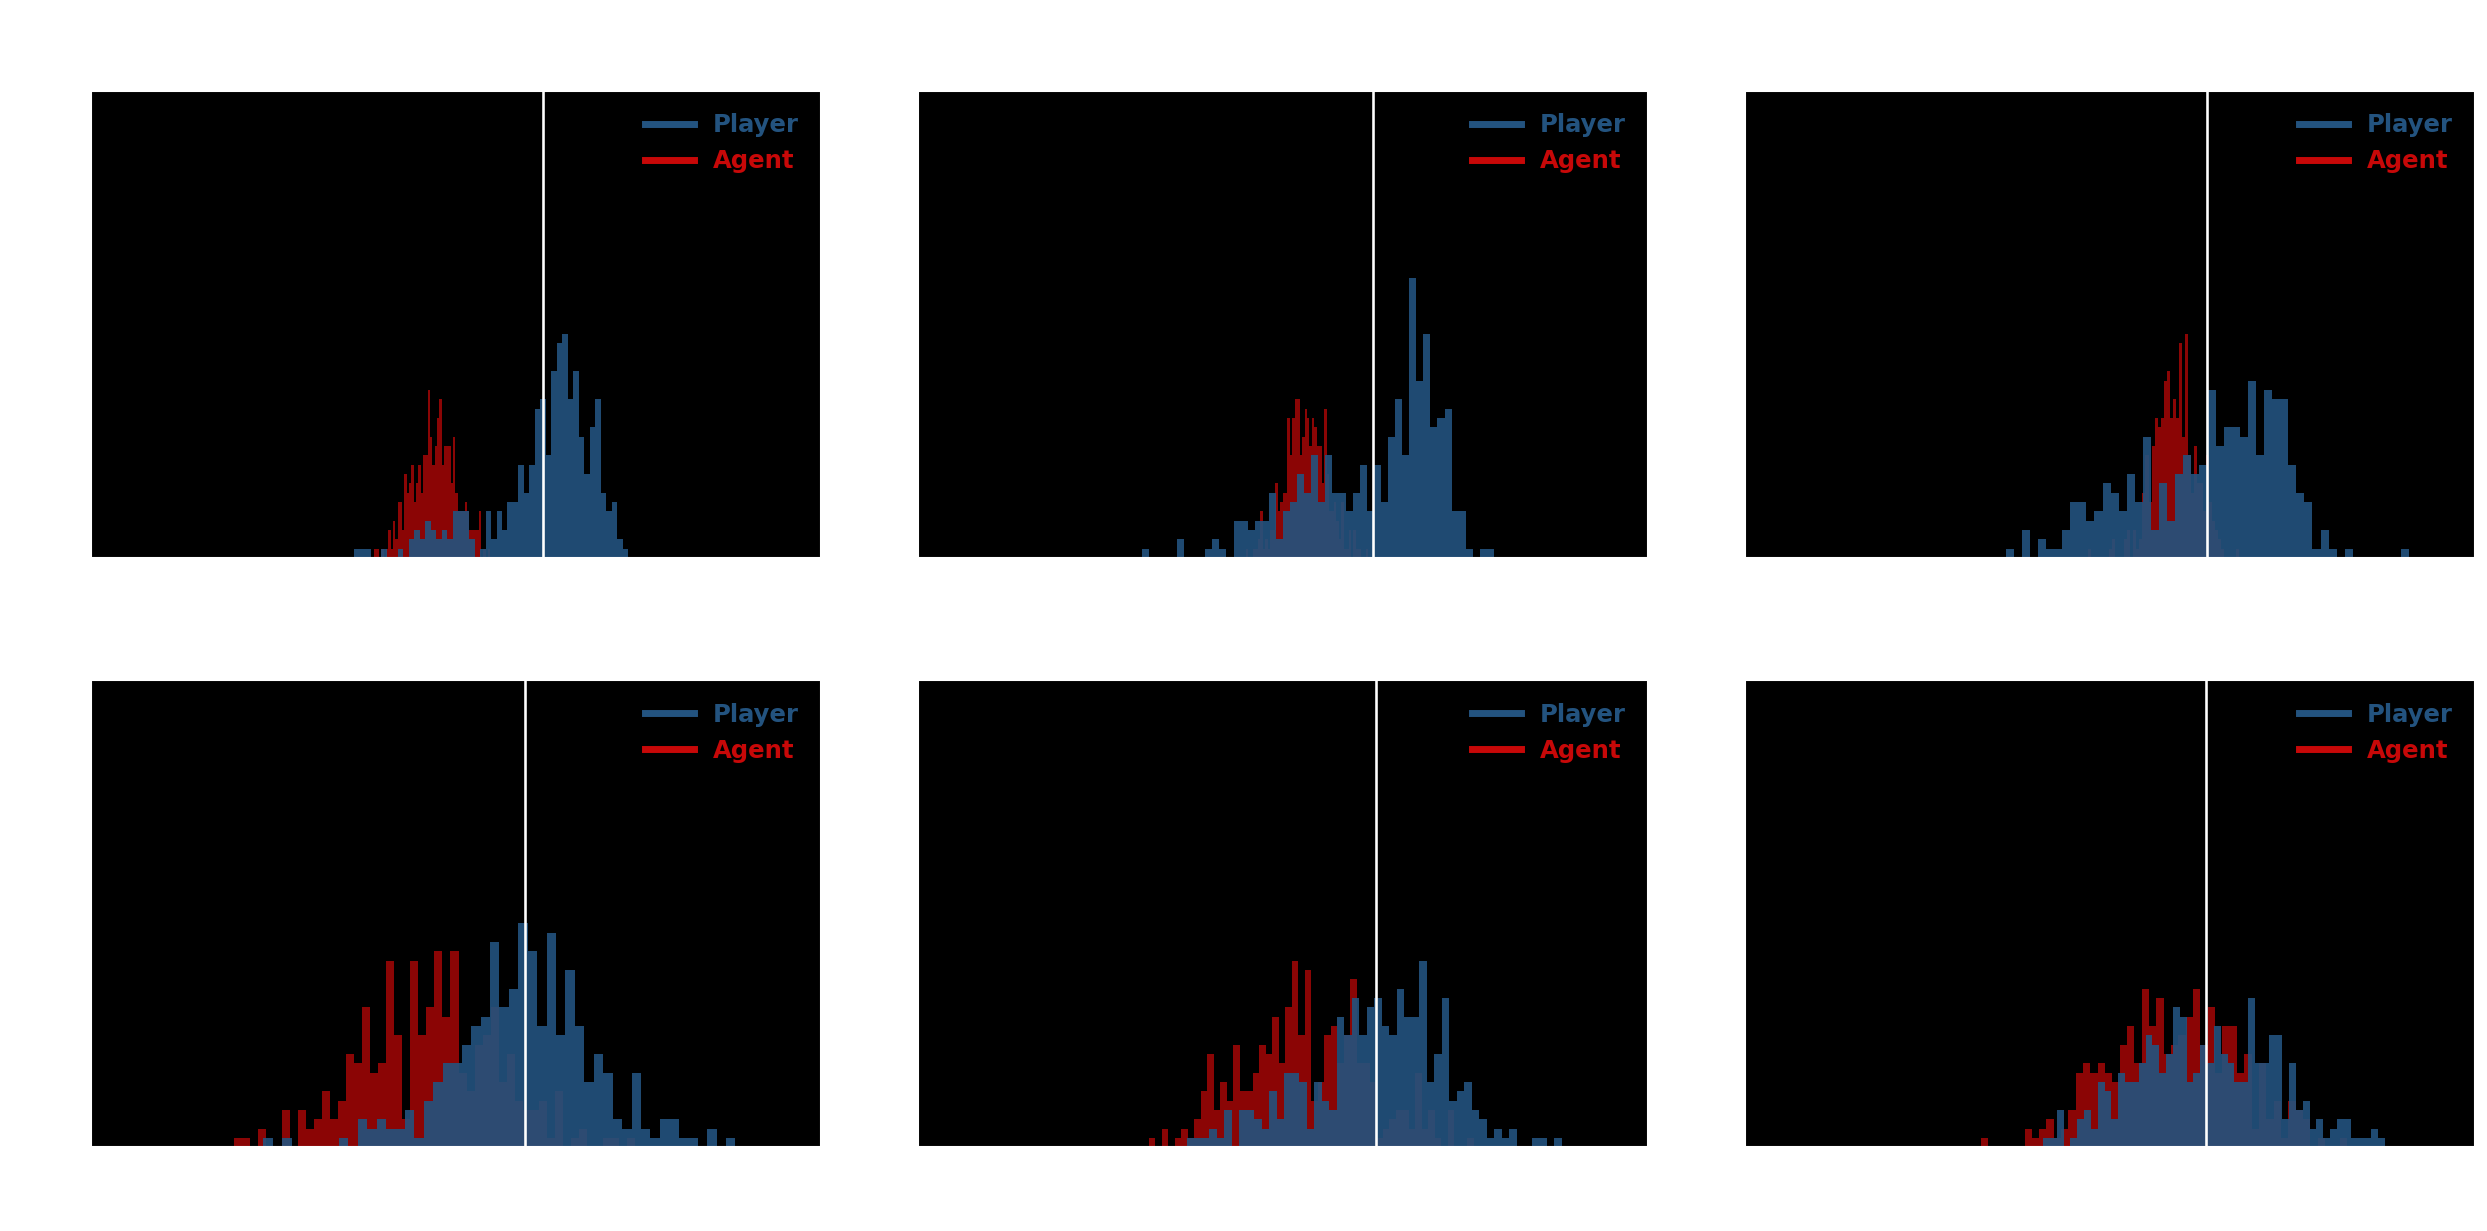

In [31]:
fig,axs = plt.subplots(2,3, figsize = (20,10), dpi = 125)
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].hist(all_agent_task_decision_times_each_condition[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.7, bins = 50)
    axs[c,d].hist(all_player_task_decision_times_each_condition[j,:], histtype = 'stepfilled', color = wheel.dark_blue, alpha = 0.9, bins =50)
    axs[c,d].axvline(all_player_mean_decision_time_each_condition[j], c='w')
    axs[c,d].set_xlim(200,1900)
    axs[c,d].set_ylim(0,50)
    axs[c,d].set_xlabel('Time (ms)')
    axs[c,d].set_ylabel('Frequency')
    labels = ["Player", "Agent"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14)
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
fig.suptitle(f'Player and Agent Decision Times', c = 'white')
plt.tight_layout()
##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Player - Agent Decision Time Distributions 

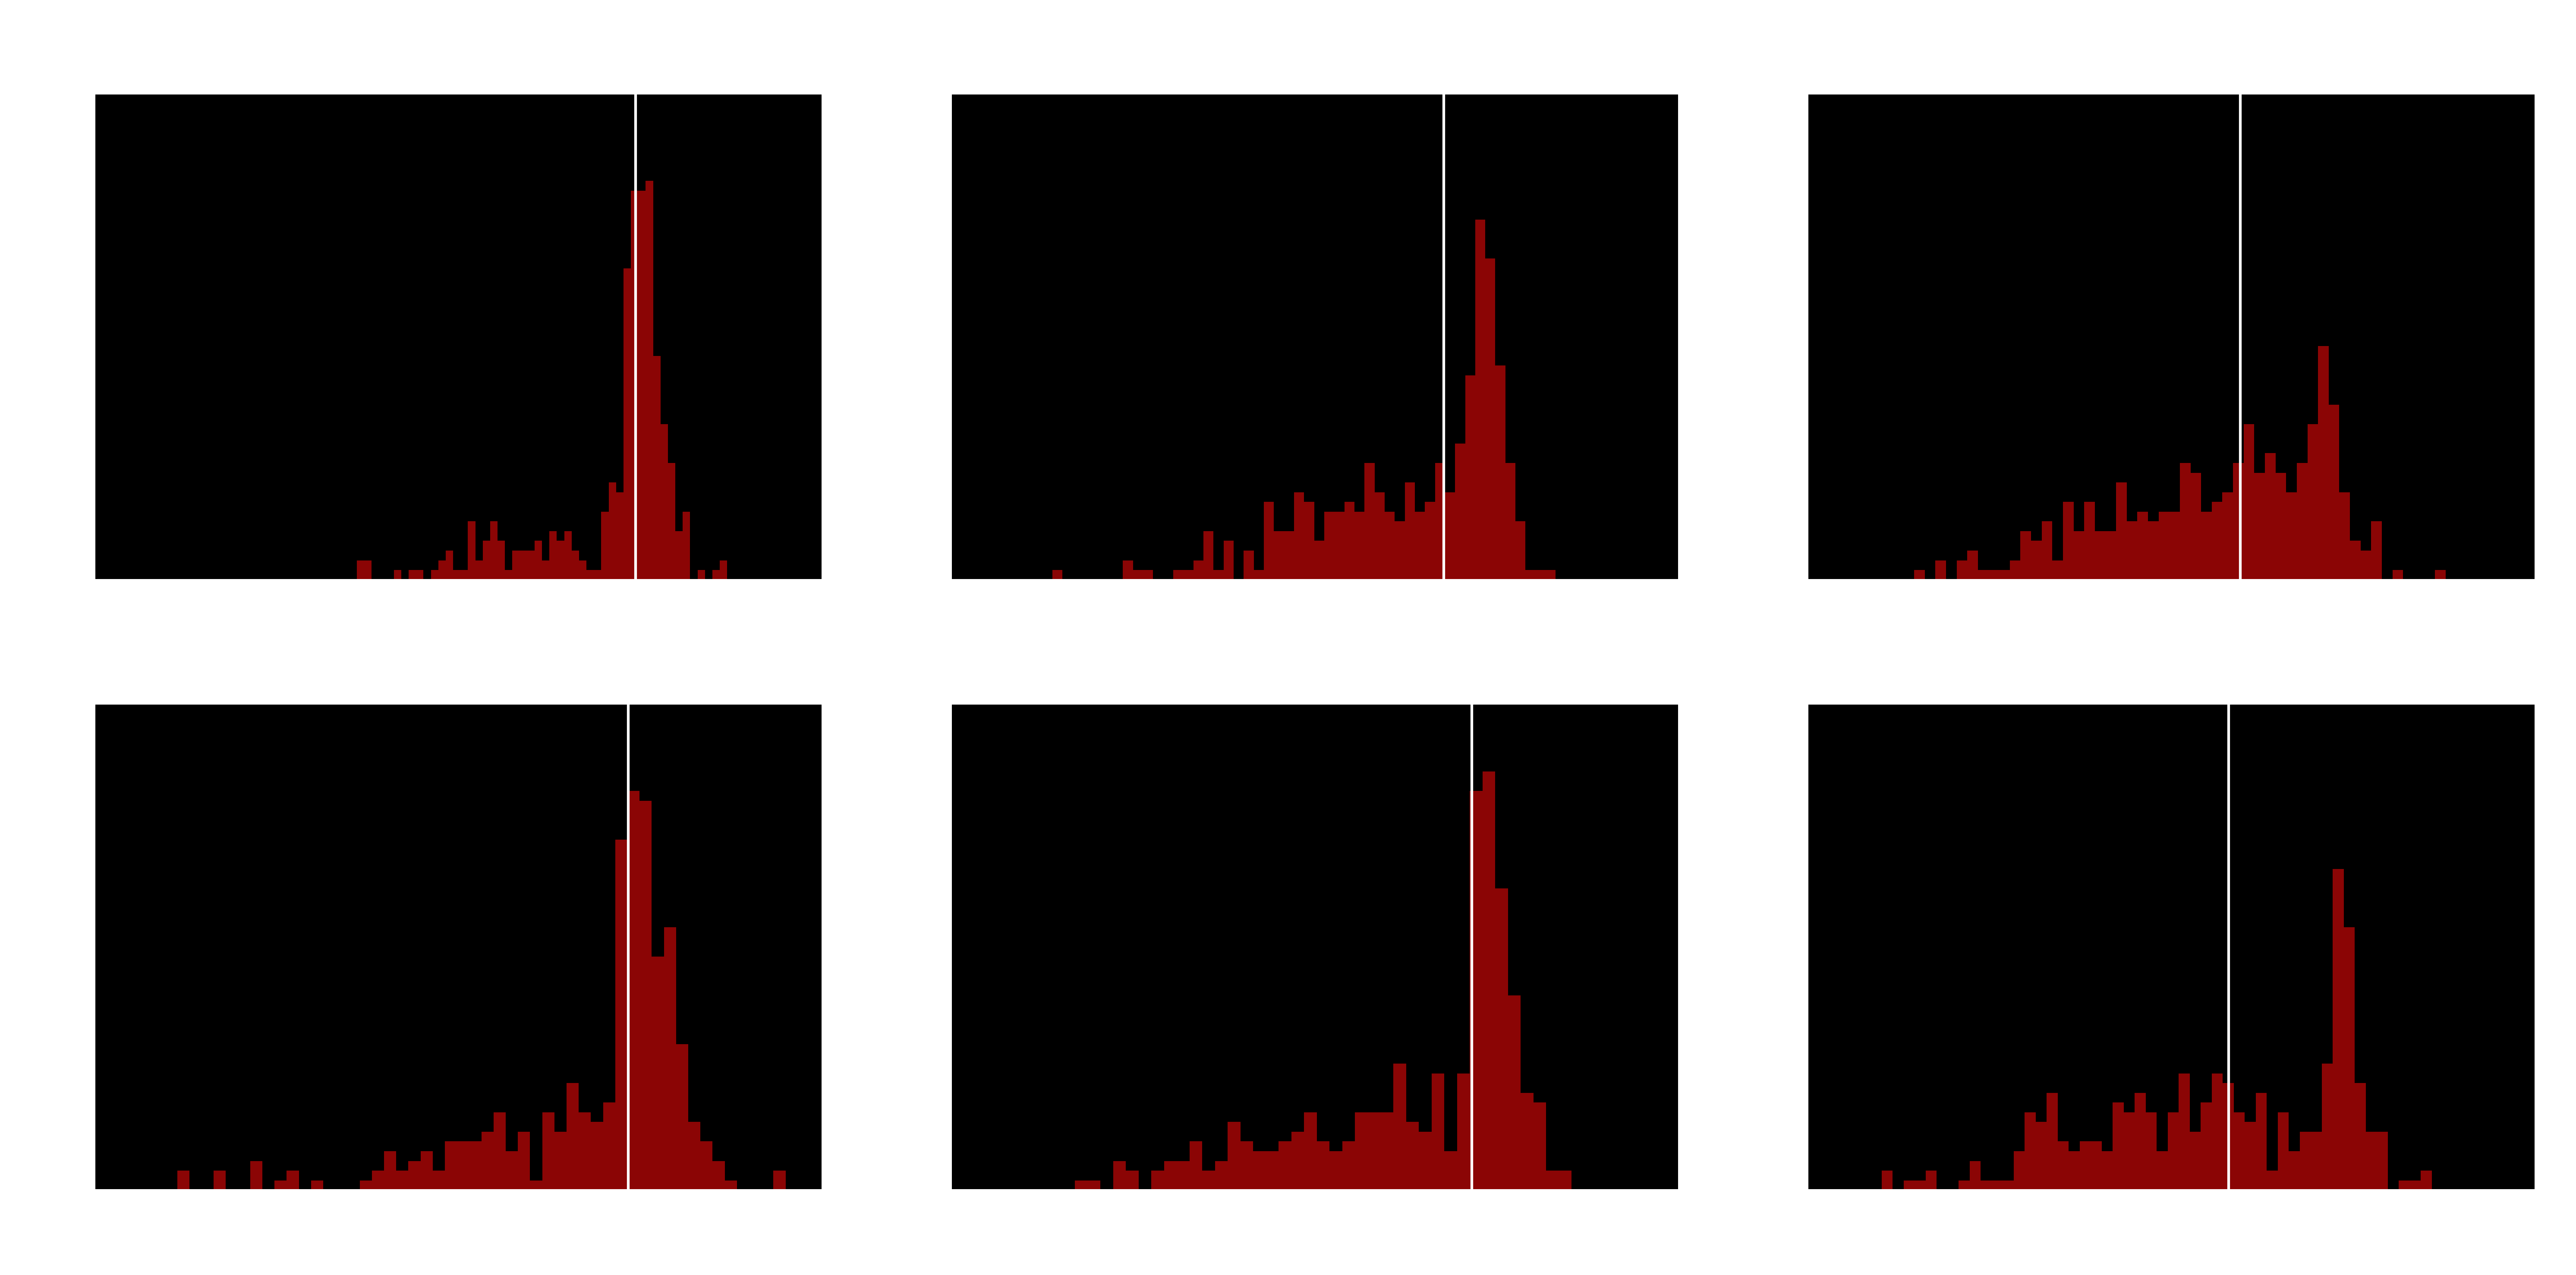

In [32]:
fig,axs = plt.subplots(2,3, figsize = (20,10), dpi = 300)
c = -1
d = 0
diff = all_player_task_decision_times_each_condition - all_agent_task_decision_times_each_condition 
median_diff = np.nanmedian(diff, axis = 1)
for j in range(num_blocks):
    c+=1
    axs[c,d].hist(diff[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.7, bins = 50)
    axs[c,d].axvline(median_diff[j], c='w')
    axs[c,d].set_xlim(-600,600)
    axs[c,d].set_ylim(0,50)
    axs[c,d].set_xlabel('Time (ms)')
    axs[c,d].set_ylabel('Frequency')
    labels = ["Player", "Agent"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14, loc = 'upper left')
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
fig.suptitle(f'Player - Agent Decision Times', c = 'white')
plt.tight_layout()
##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reach Time Distributions

In [33]:
# fig,axs = plt.subplots(2,3, figsize = (20,10), dpi = 125)
# c = -1
# d = 0
# for j in range(num_blocks):
#     c+=1
#     axs[c,d].hist(all_agent_task_reach_times_each_condition[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.9, bins = 50)
#     axs[c,d].hist(all_player_task_reach_times_each_condition[j,:], histtype = 'stepfilled', color = wheel.dark_blue, alpha = 0.7, bins =50)
#     axs[c,d].axvline(all_player_mean_reach_time_each_condition[j], c='w')
#     axs[c,d].set_xlim(200,1900)
#     axs[c,d].set_ylim(0,50)
#     axs[c,d].set_xlabel('Time (ms)')
#     axs[c,d].set_ylabel('Frequency')
#     labels = ["Player", "Agent"]
#     colors = [wheel.dark_blue, wheel.dark_red]
#     dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14)
#     axs[c,d].set_title(trial_block_titles[j])
#     if c == 1:
#         d += 1
#         c = -1
# fig.suptitle(f'Player and Agent Reach Times', c = 'white')
# plt.tight_layout()
# ##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
# plt.show()

Bar plot, total number of reach times after 1500 each condition

<BarContainer object of 6 artists>

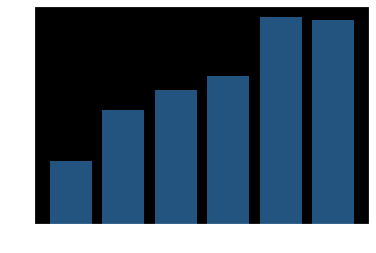

In [34]:
indecisions_each_condition = np.count_nonzero(all_player_task_reach_times_each_condition>1500, axis = 1)
perc_indecisions_each_condition = (indecisions_each_condition/(num_subjects*num_trials))*100
fig, ax = plt.subplots()
xlocs = np.arange(0,num_blocks)
ax.bar(xlocs,perc_indecisions_each_condition)

Reaction time means boxplot

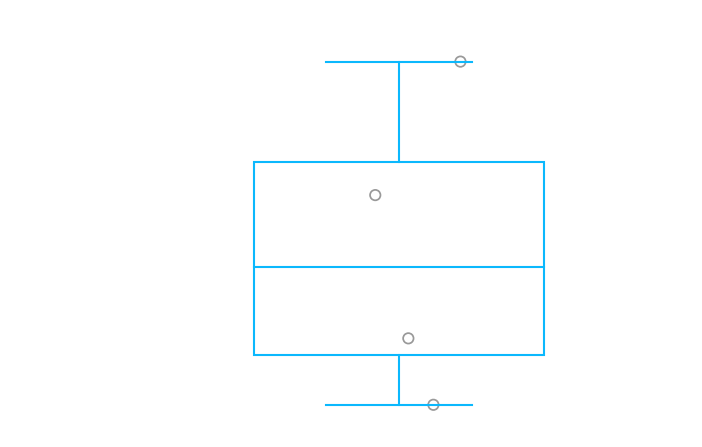

In [35]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_time_mean), reaction_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Reaction Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'reaction_times', dpi = 400, transparent = True, bbox_inches='tight')


Reaction time SD 

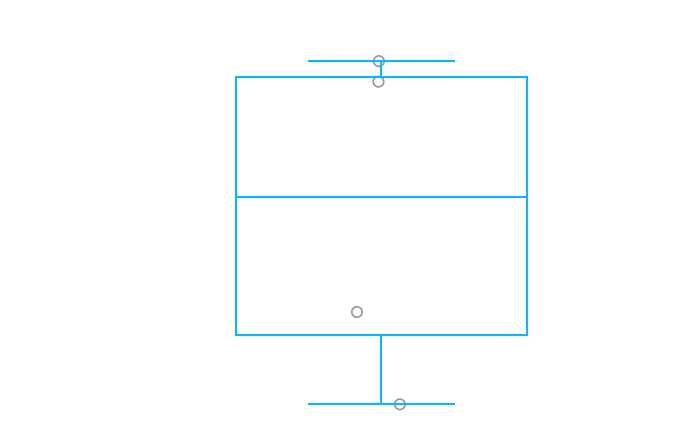

In [36]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_time_sd), reaction_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Reaction Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'reaction_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Reaction Movement time boxplot

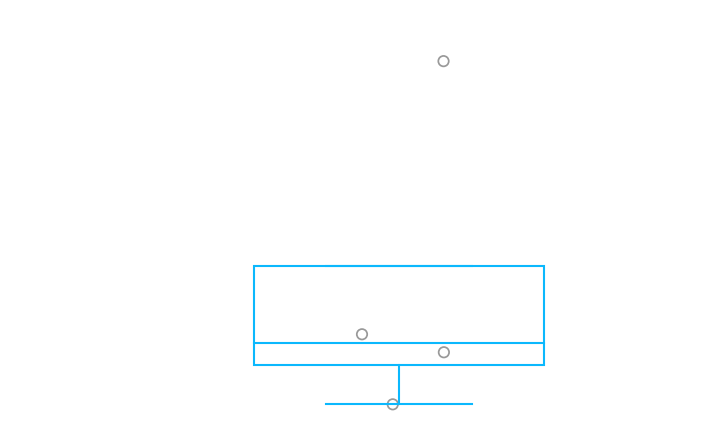

In [37]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_movement_time_mean), reaction_movement_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_movement_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Reaction Trials Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'reaction_movement_times', dpi = 400, transparent = True, bbox_inches='tight')


REaction Movement time sd boxplot

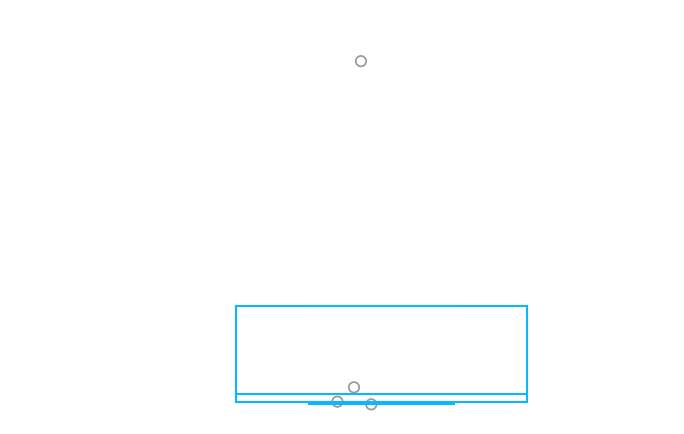

In [38]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_movement_time_sd), reaction_movement_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_movement_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Reaction Trials Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'reaction_movement_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Reaction PLUS Movement Times

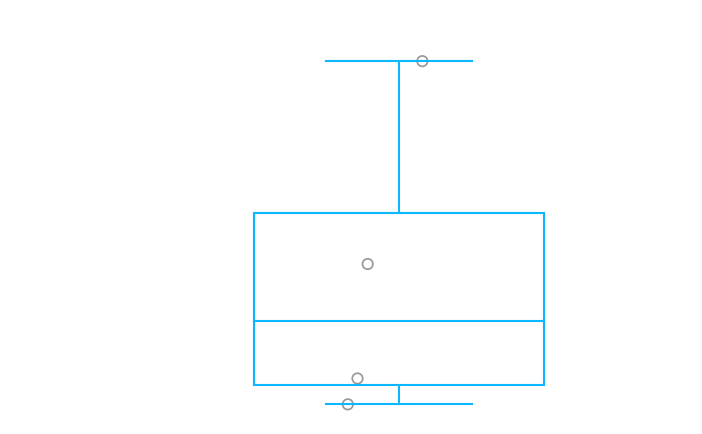

In [39]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_plus_movement_time_mean), reaction_plus_movement_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_plus_movement_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Reaction + Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'movement_times', dpi = 400, transparent = True, bbox_inches='tight')

In [40]:
for i in range(num_subjects):
    for j in range(50):
        if reaction_plus_movement_time[i,j]<350:
            print(i,j)
            print(reaction_plus_movement_time[i,j])

3 13
349.279541015625


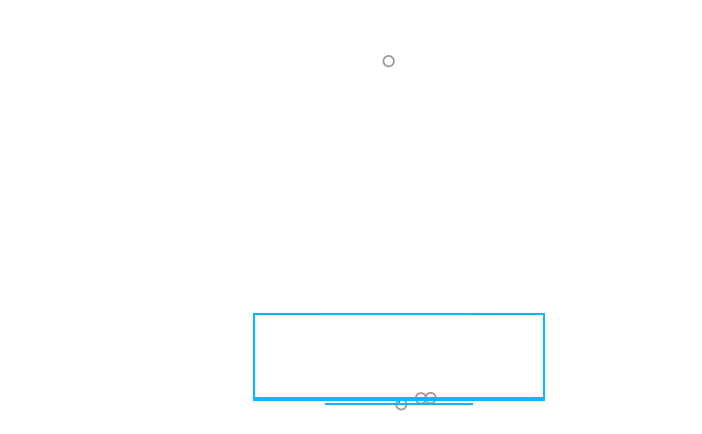

In [41]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, reaction_plus_movement_time_sd), reaction_plus_movement_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(reaction_plus_movement_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Reaction +  Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'movement_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Timing

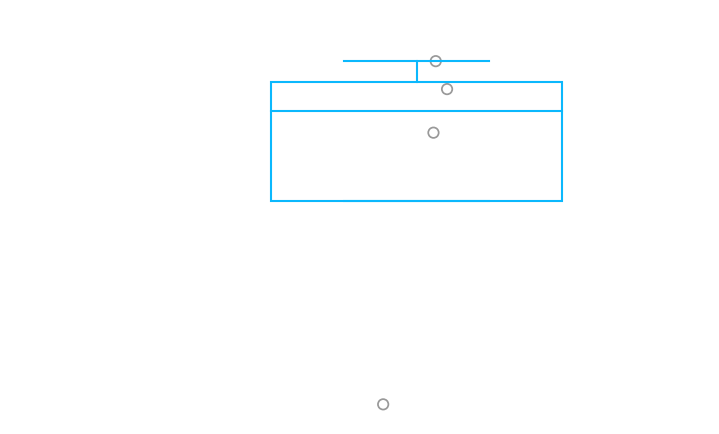

In [42]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, interval_reach_time_mean), interval_reach_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(interval_reach_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Interval Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'interval_reach_times_mean', dpi = 400, transparent = True, bbox_inches='tight')

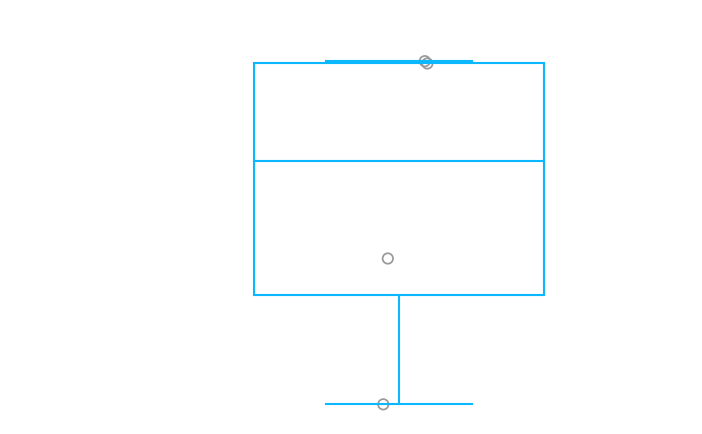

In [43]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, interval_reach_time_sd), interval_reach_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(interval_reach_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Interval Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'timing_reach_times_sd', dpi = 400, transparent = True, bbox_inches='tight')

Coincidence Mean Reach Times

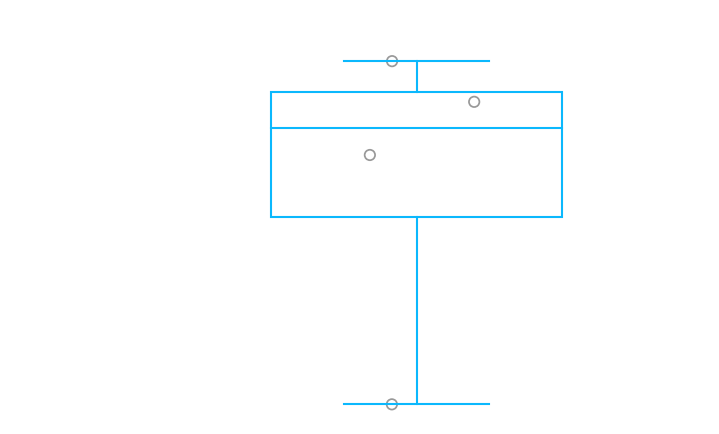

In [44]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, coincidence_reach_time_mean), coincidence_reach_time_mean, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(coincidence_reach_time_mean, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Coincidence Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'coincidence_reach_times_mean', dpi = 400, transparent = True, bbox_inches='tight')

Coincidence SD Reach Times

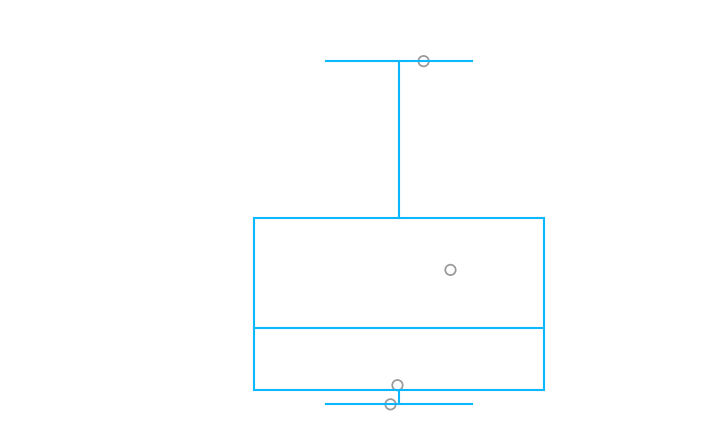

In [45]:
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, coincidence_reach_time_sd), coincidence_reach_time_sd, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(coincidence_reach_time_sd, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Coincidence Reach Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'coincidence_reach_times_mean', dpi = 400, transparent = True, bbox_inches='tight')

Task Movement Times 

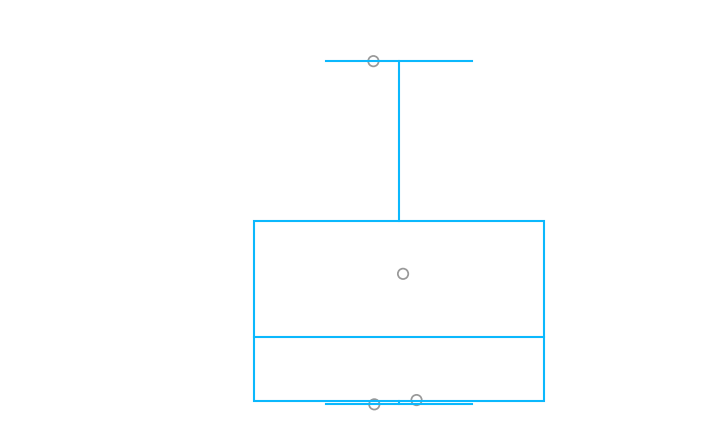

In [46]:
task_movement_times = player_task_reach_time - player_task_decision_time
mean_task_movement_times = np.nanmean(task_movement_times, axis = 2)
mean_task_movement_times = np.nanmean(mean_task_movement_times, axis =1)
fig,ax = plt.subplots(dpi=125)
xlocs = [0]*num_subjects
ylocs = np.arange(200,400,25)
ax.scatter(jitter(xlocs, mean_task_movement_times), mean_task_movement_times, facecolor = 'none', edgecolors='0.6')
bp3 = dv.boxplot(mean_task_movement_times, ax=ax, x_pos = 0)
ax.set_ylabel('Time (ms)')
ax.set_title('Task Mean Movement Times')
ax.xaxis.set_ticklabels([])
ax.get_xaxis().set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'task_movement_times_mean', dpi = 400, transparent = True, bbox_inches='tight')


Mean Decision Times boxplot

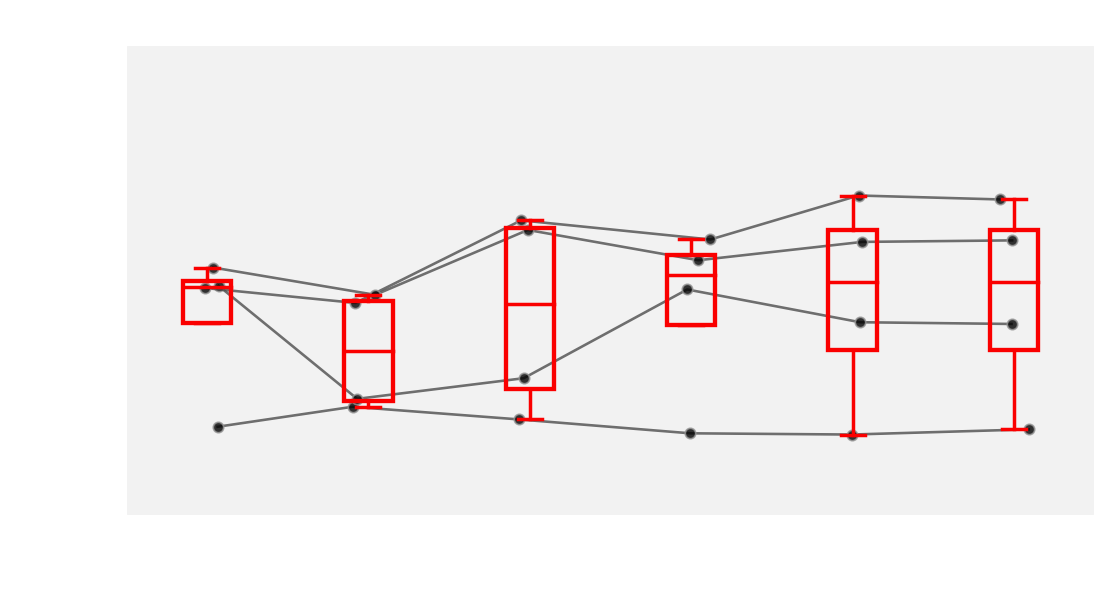

In [47]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()

ax.plot(jitter(xlocs, player_mean_decision_time).T,player_mean_decision_time.T, marker = 'o', markerfacecolor = dot_color, markeredgecolor = '0.6', color = '0.3', alpha = 0.8,zorder=1 )
boxplot(player_mean_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(1000,1600)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

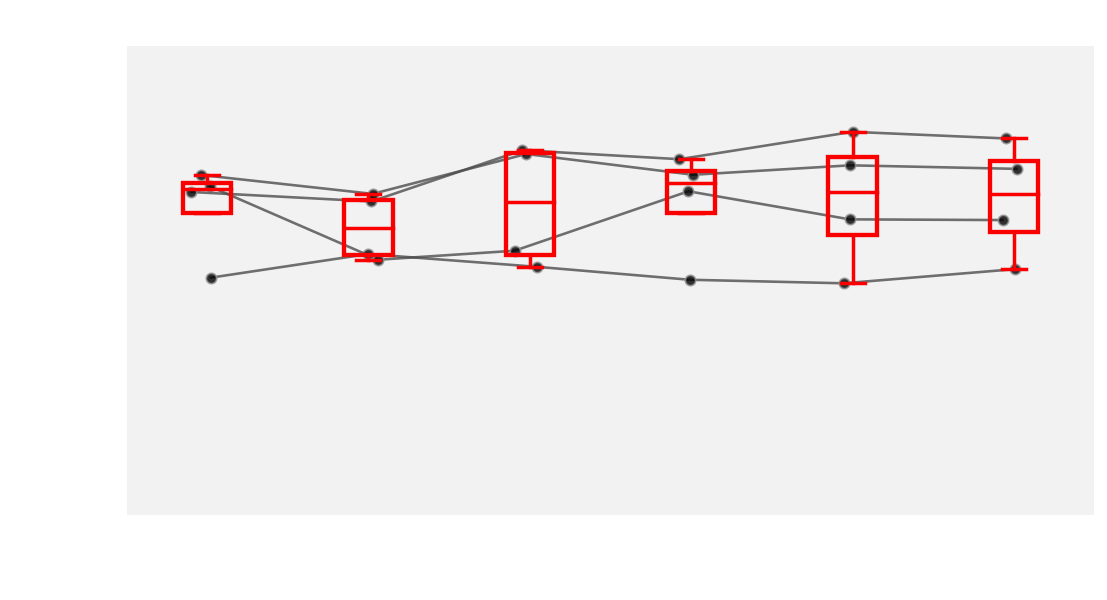

In [48]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()

ax.plot(jitter(xlocs, player_median_decision_time).T,player_median_decision_time.T, marker = 'o', markerfacecolor = dot_color, markeredgecolor = '0.6', color = '0.3', alpha = 0.8,zorder=1 )
boxplot(player_median_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='Median Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(600,1600)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Player - Agent Mean Decision Times

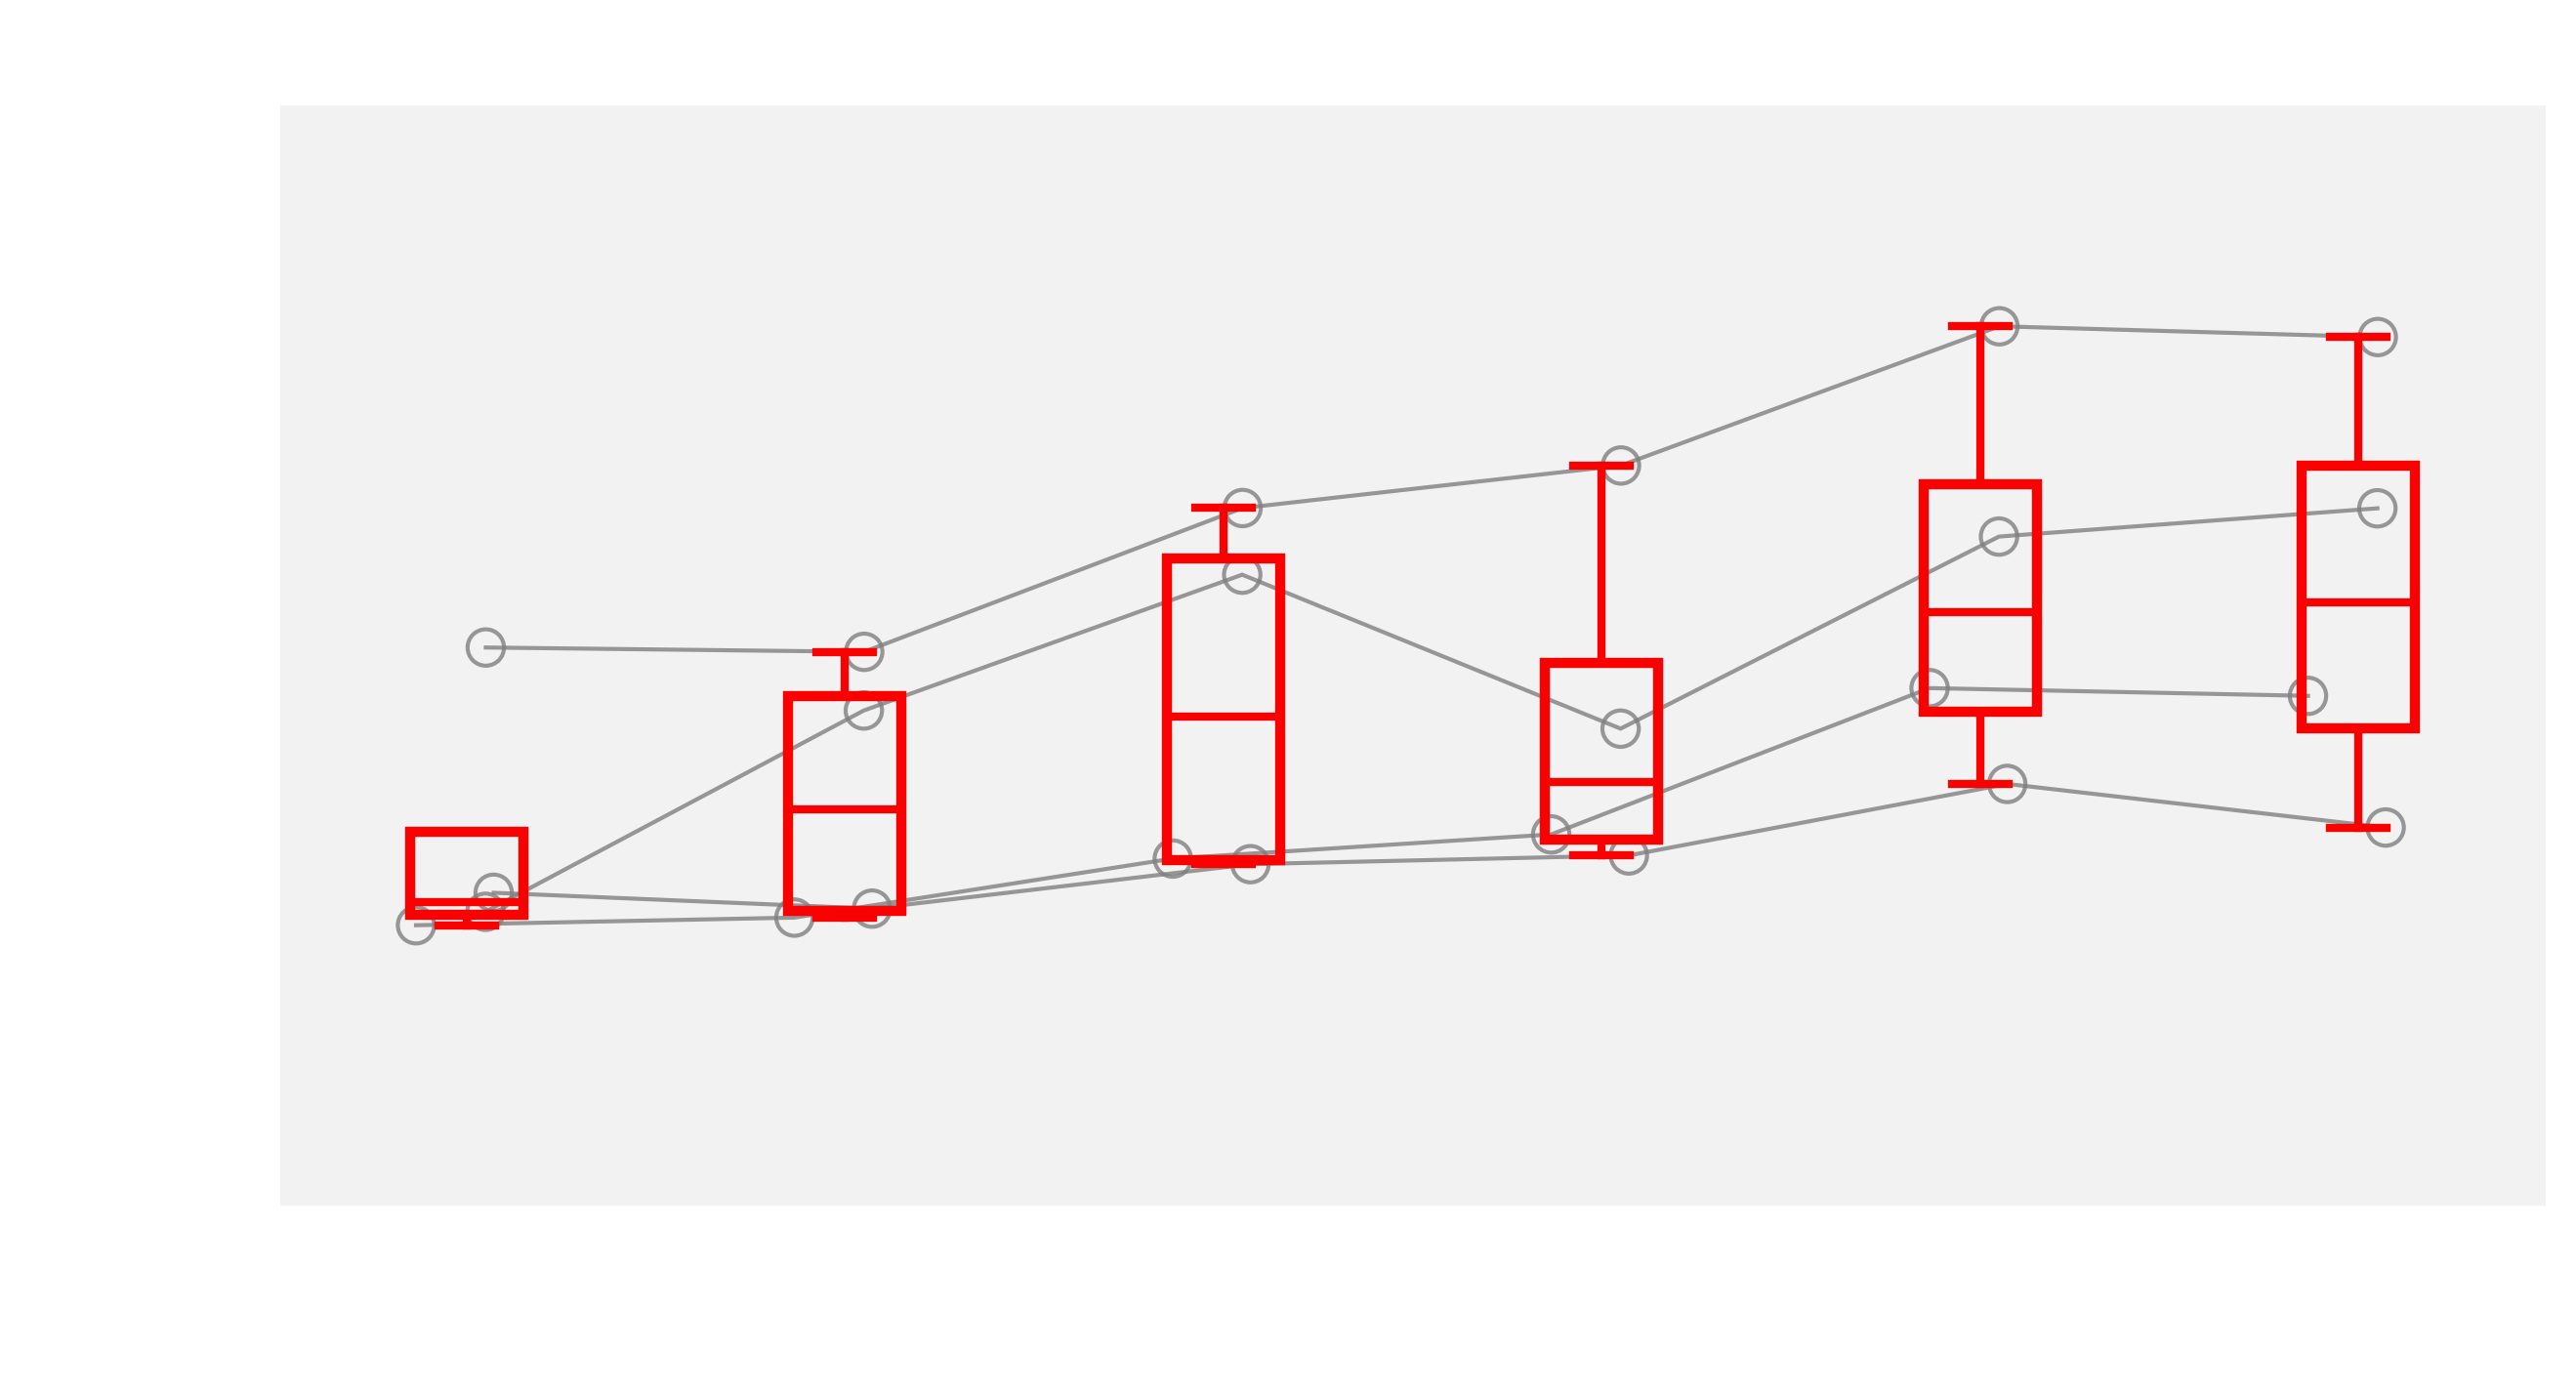

In [50]:
agent_minus_player_decision_time =  agent_task_decision_time - player_task_decision_time
mean_agent_minus_player_task_decision_time = np.nanmean(agent_minus_player_decision_time, axis = 2)
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(-500,500,100)
plt.figure(dpi=300, figsize = (10,5))
ax=plt.subplot()
dv.jitter_array(ax,xlocs,mean_agent_minus_player_task_decision_time.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.8, include_mean = False, )

boxplot(mean_agent_minus_player_task_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='(Agent-Player) Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(-500,250)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Decision Times Violin Plot

In [ ]:
# xlocs = np.arange(0, num_blocks)
# ylocs = np.arange(400,1800,200)
# plt.figure(dpi=125, figsize = (10,5))
# ax=plt.subplot()
# violinplot(all_decision_times_each_condition.T, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
#         ylab='Time (ms)', title='Decision Times')
# ax.set_xticks(xlocs)
# ax.set_xticklabels(trial_block_titles)
# ax.set_ylim(400,1500)
# #plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
# plt.show()

Indecisions, Wins, Wrong Decisions

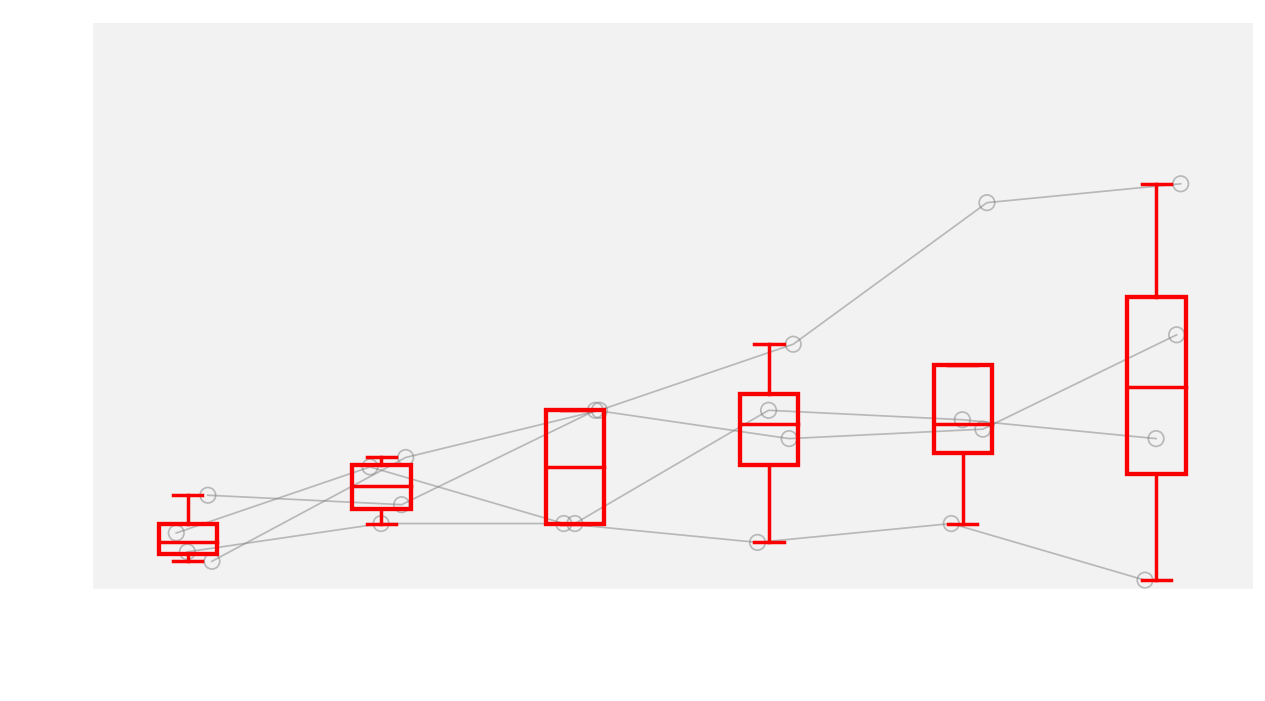

In [52]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
stored_optimal_indecisions = [0.06,12.07,8.5,13.84,0.3,6.24]

plt.figure(dpi=125, figsize=(12,6))
ax=plt.subplot()
boxplot(perc_player_indecisions, box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD \nMovement Onset Time (ms)",
       ylab='Indecisions (%)', title=None)
#ax.plot(jitter(xlocs, perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
dv.jitter_array(ax,xlocs,perc_player_indecisions.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.5, include_mean = False )
#ax.scatter(xlocs,stored_optimal_indecisions, marker = 's', s = 100,c=wheel.purple, zorder = 20)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,75)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#dv.Custom_Legend(ax,['Optimal Indecisions','Mean Indecisions'],[wheel.purple,wheel.dark_grey], fontsize = 24)
#plt.savefig(PATH+SAVE_PATH+'indecision_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

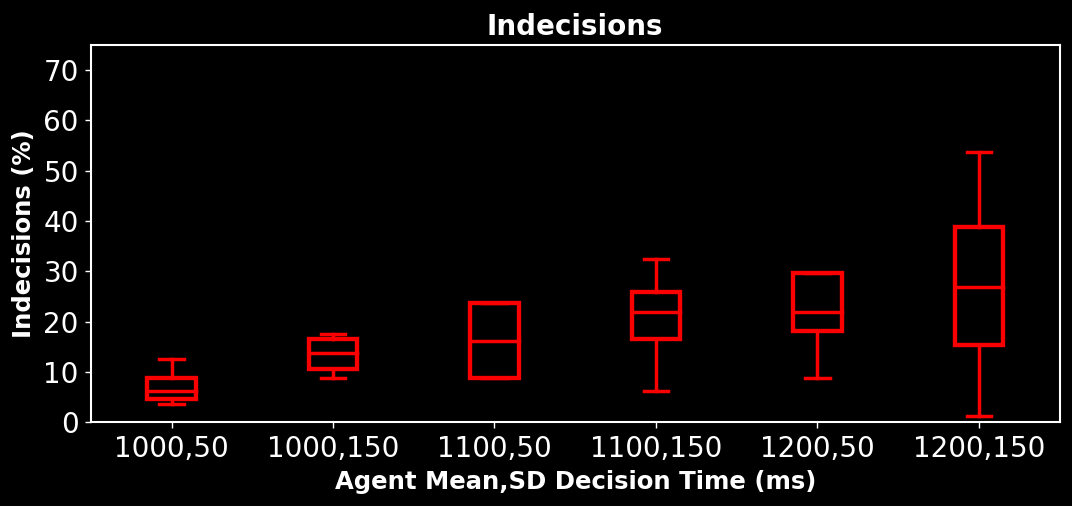

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,75,10)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_indecisions,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Indecisions (%)', title='Indecisions')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,75)
#plt.savefig(PATH+SAVE_PATH+'indecision_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

In [ ]:
perc_player_wins

array([[47.5 , 55.  , 51.25, 45.  , 46.25, 50.  ],
       [88.75, 65.  , 47.5 , 55.  , 31.25, 52.5 ],
       [96.25, 80.  , 73.75, 63.75, 38.75, 45.  ],
       [82.5 , 85.  , 58.75, 61.25, 50.  , 42.5 ]])

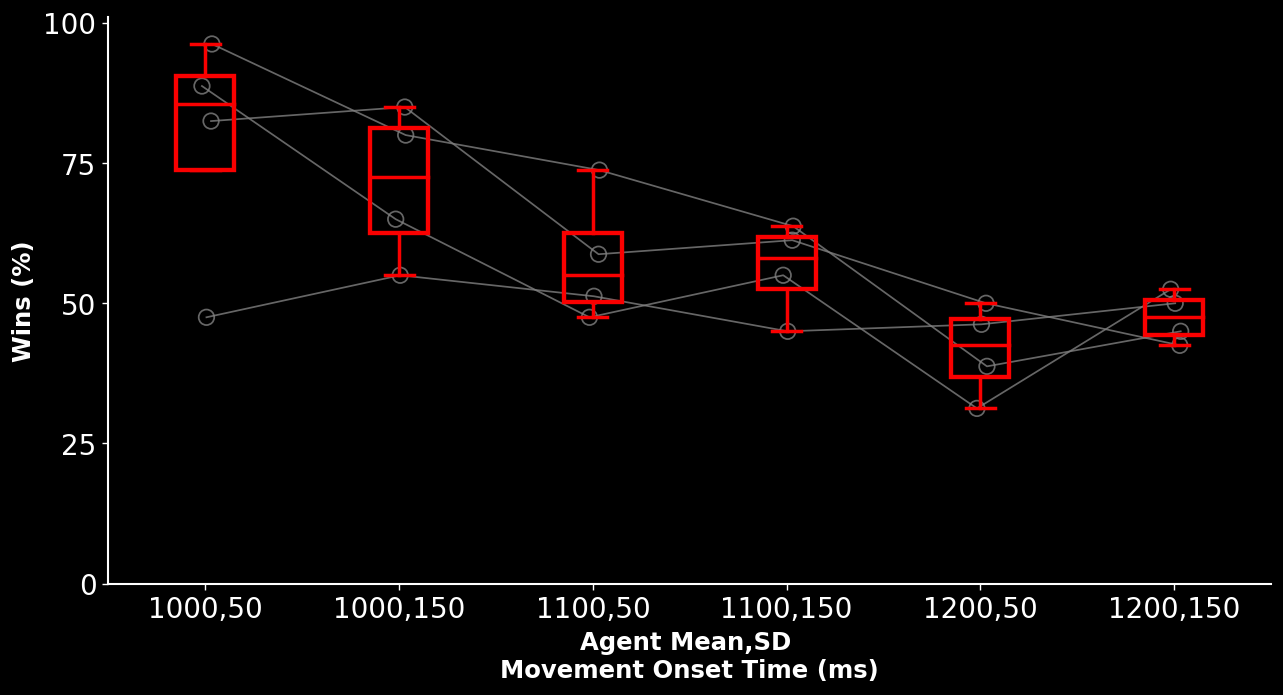

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(12,6))
ax=plt.subplot()
boxplot(perc_player_wins, box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD \nMovement Onset Time (ms)",
        ylab='Wins (%)', title=None)
#ax.plot(jitter(xlocs, perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
dv.jitter_array(ax,xlocs,perc_player_wins.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.8, include_mean = False, )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,101)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#plt.savefig(PATH+SAVE_PATH+'indecision_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

In [54]:
player_wins

array([[38., 44., 41., 36., 37., 40.],
       [71., 52., 38., 44., 25., 42.],
       [77., 64., 59., 51., 31., 36.],
       [66., 68., 47., 49., 40., 34.]])

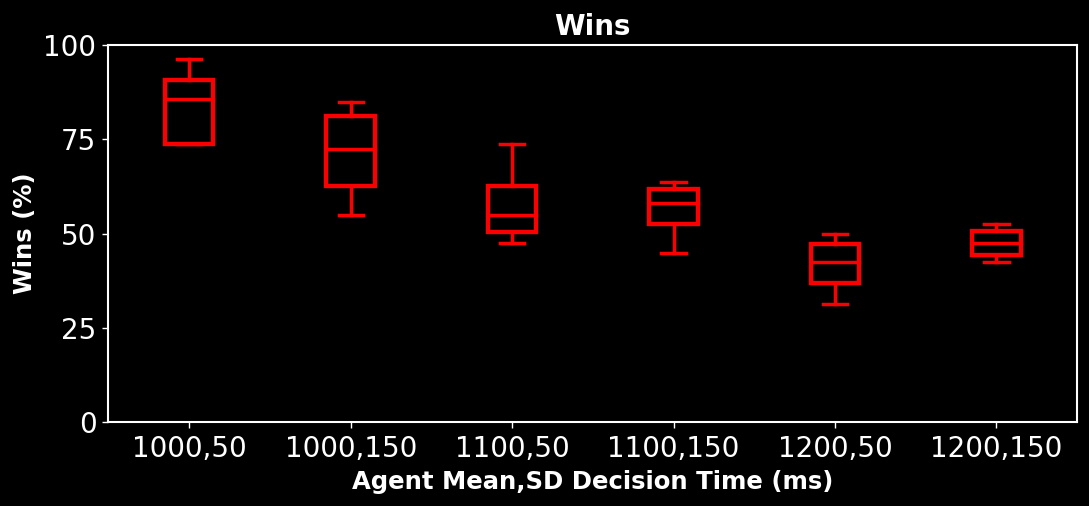

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_wins,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title='Wins')
ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'wins_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

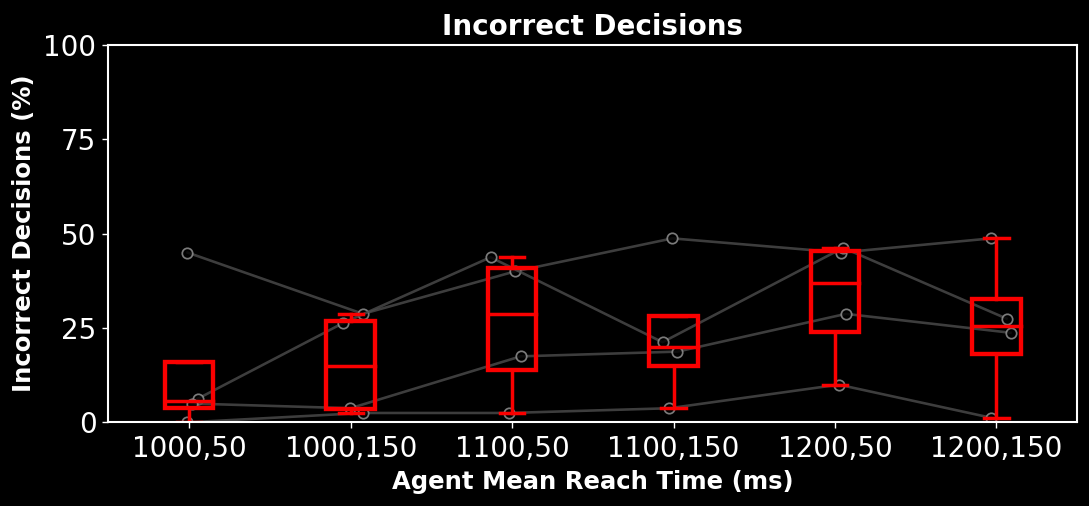

In [ ]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_incorrects, box_widths = 0.05,xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
ax.plot(jitter(xlocs, perc_player_incorrects).T,perc_player_incorrects.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
#plt.savefig(PATH+SAVE_PATH+'incorrect_decisions_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

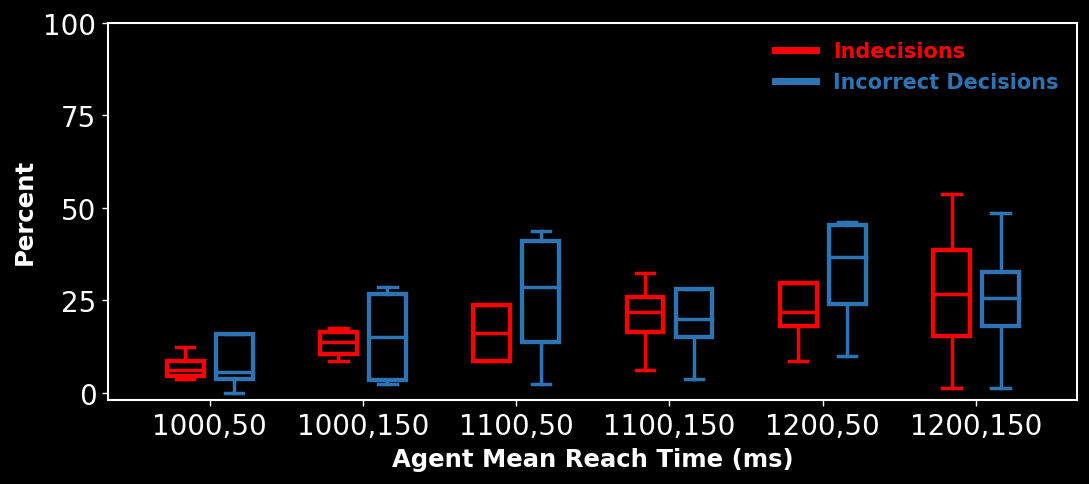

In [ ]:
#%% Incorrect decisions and indecisions boxplot together
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,110,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_indecisions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Indecisions', "Incorrect Decisions"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#ax.plot(jitter((xlocs-box_width*4), perc_player_indecisions).T,perc_player_indecisions.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )

boxplot(perc_player_incorrects, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Indecisions', "Incorrect Decisions"],xlab = "Agent Mean Reach Time (ms)",
        ylab='Percent', title='')
#ax.plot(jitter((xlocs+box_width*4), perc_player_incorrects).T,perc_player_incorrects.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(-2,100)
#plt.savefig(PATH+SAVE_PATH+'indecisions_incorrect_decisions_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

incorrect decisions vs wins scatter

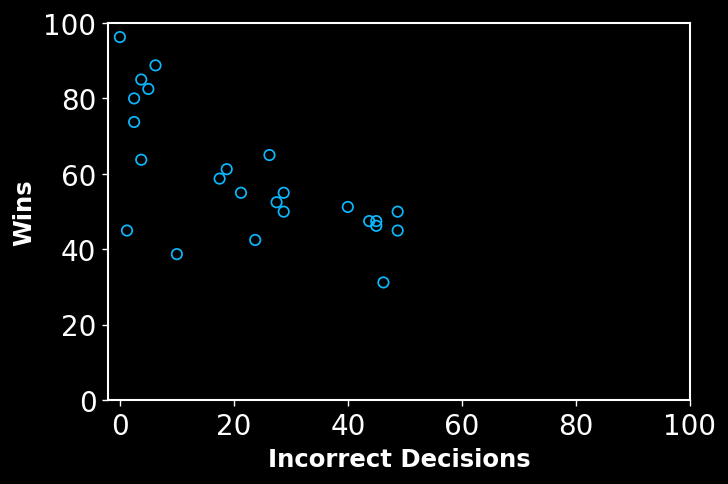

In [ ]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(perc_player_incorrects, perc_player_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Incorrect Decisions')
ax.set_ylabel('Wins')
ax.set_xlim(-2,100)
ax.set_ylim(0,100)
plt.show()

# Doesn't control for reaction time

Indecisions vs Wins scatter (all on one)

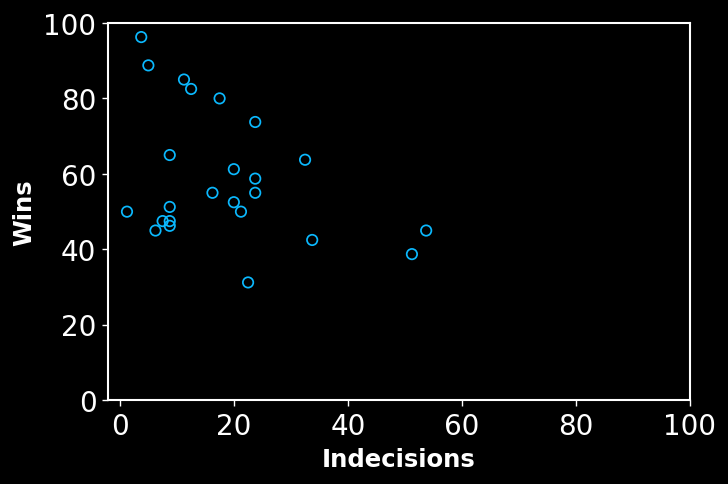

In [ ]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(perc_player_indecisions, perc_player_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Indecisions')
ax.set_ylabel('Wins')
ax.set_xlim(-2,100)
ax.set_ylim(0,100)
plt.show()

Mean Decision Time vs Wins Scatter

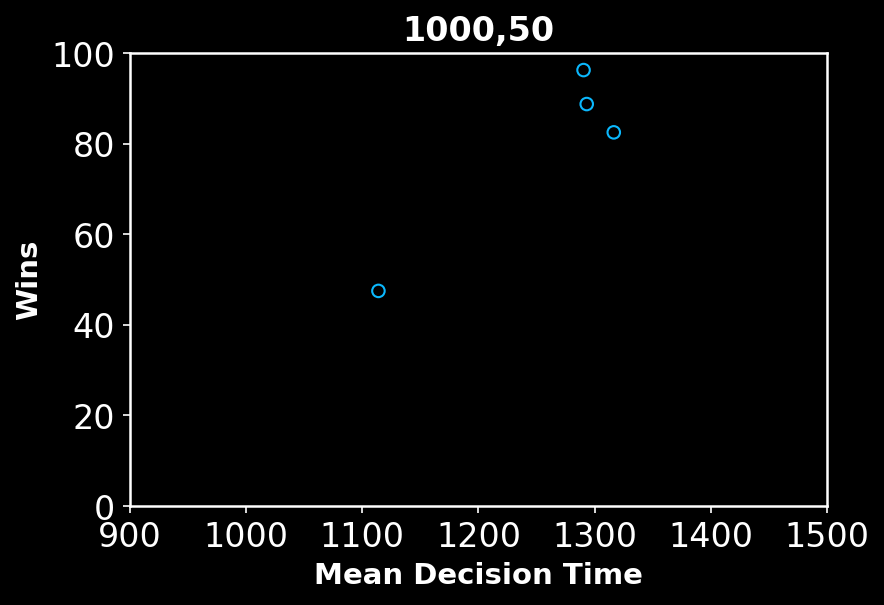

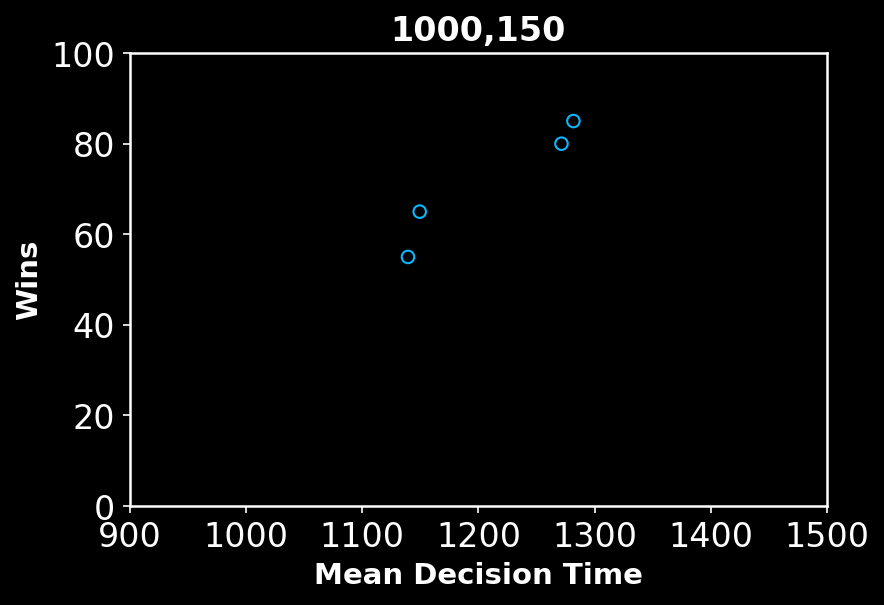

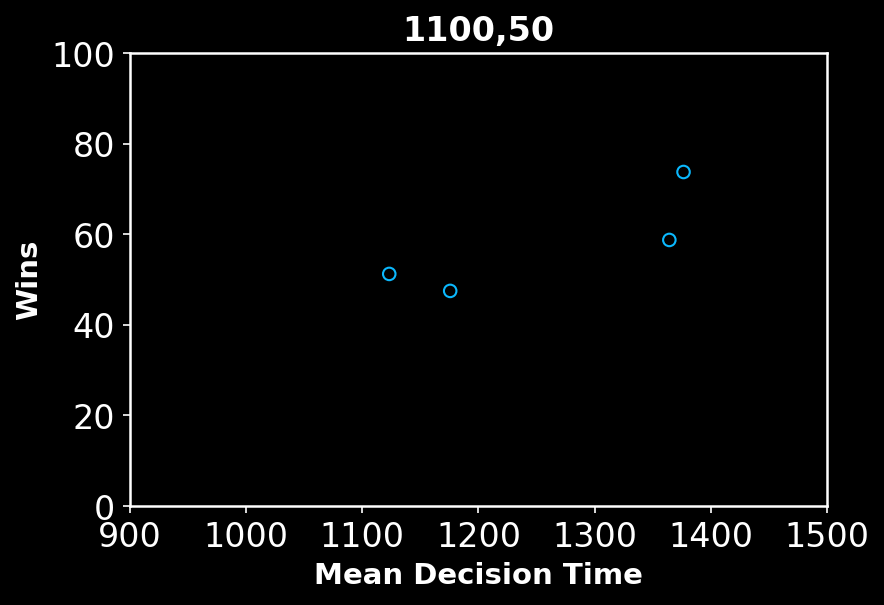

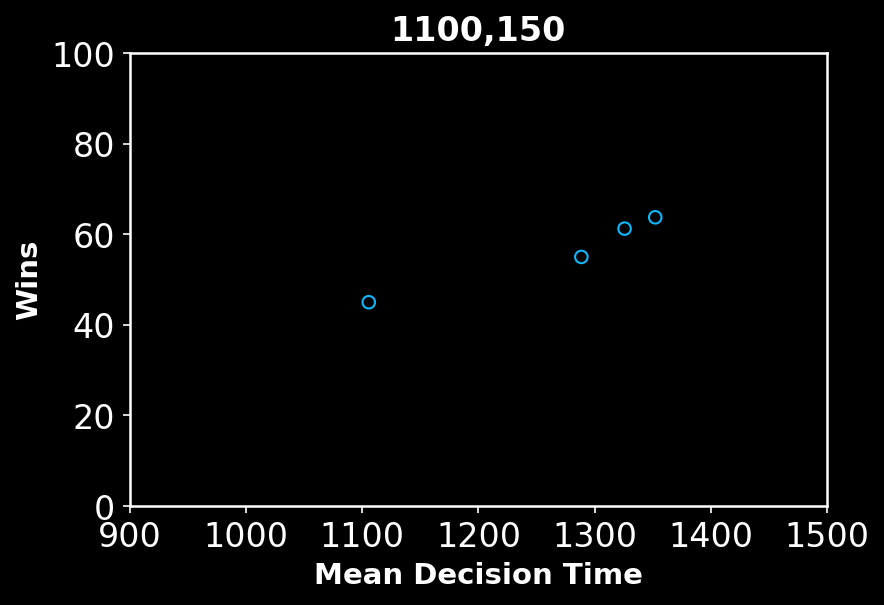

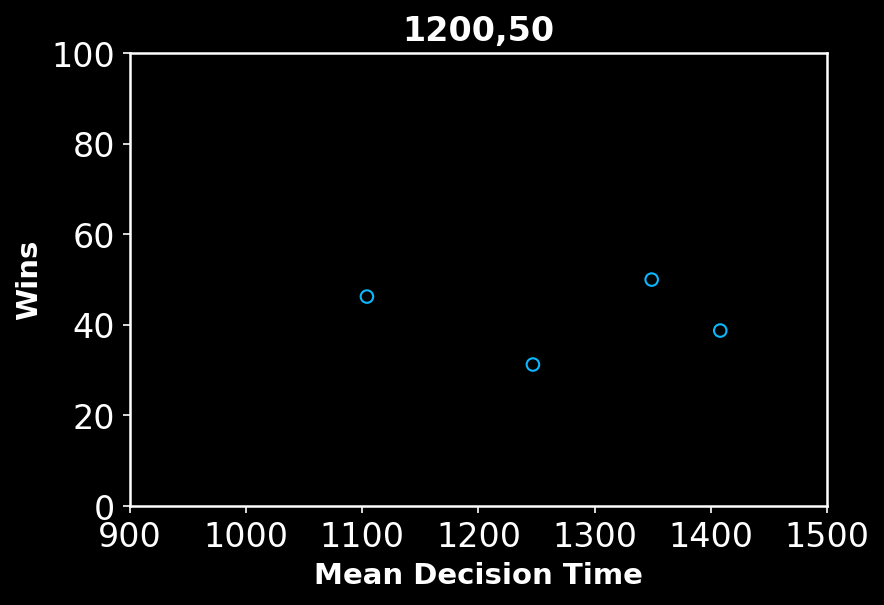

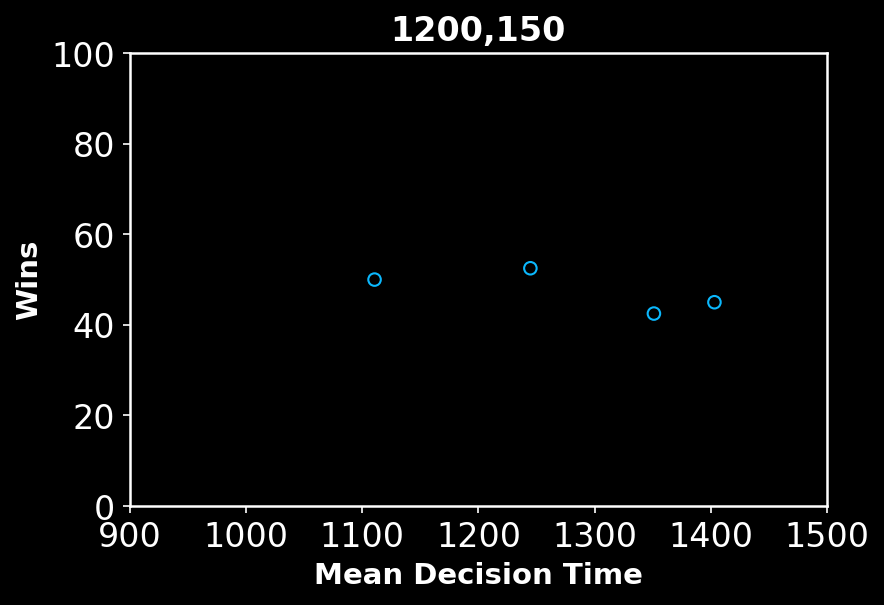

In [ ]:
for j in range(num_blocks):
    fig,ax = plt.subplots(dpi = 150)
    ax.scatter(player_mean_decision_time[:,j], perc_player_wins[:,j], facecolor='none', edgecolors=wheel.rak_blue)
    ax.set_xlabel('Mean Decision Time')
    ax.set_ylabel('Wins')
    ax.set_xlim(900,1500)
    ax.set_ylim(0,100)
    ax.set_title(trial_block_titles[j])
    plt.show()

Indecisions vs wins for each condition scatter

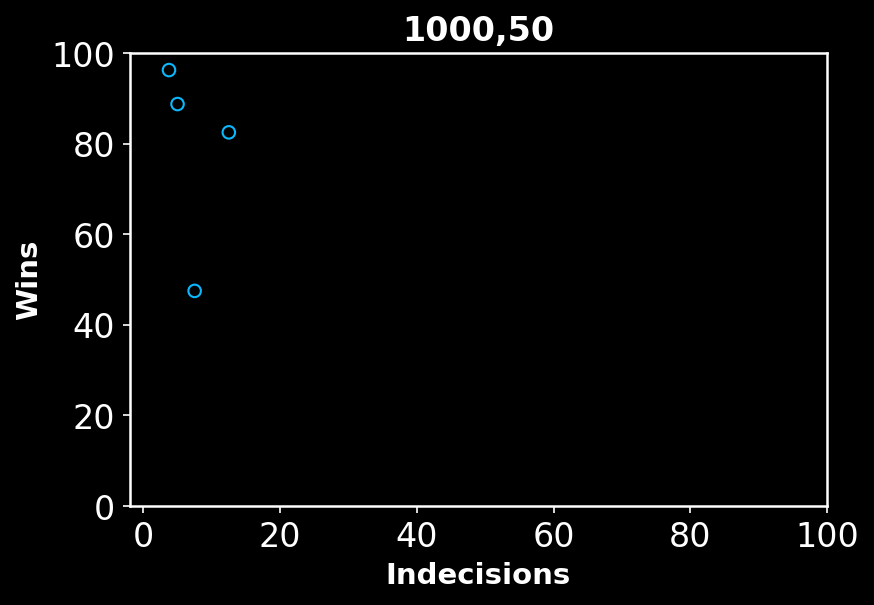

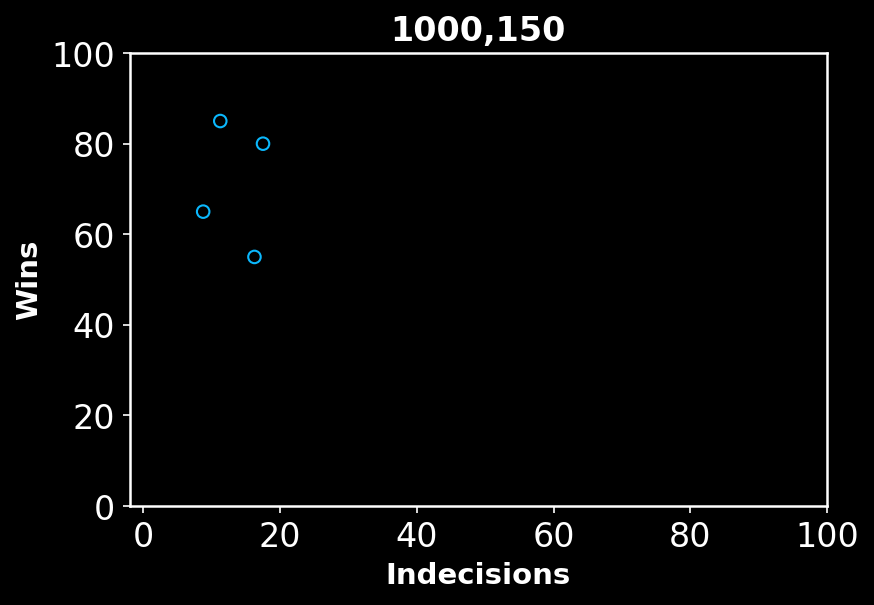

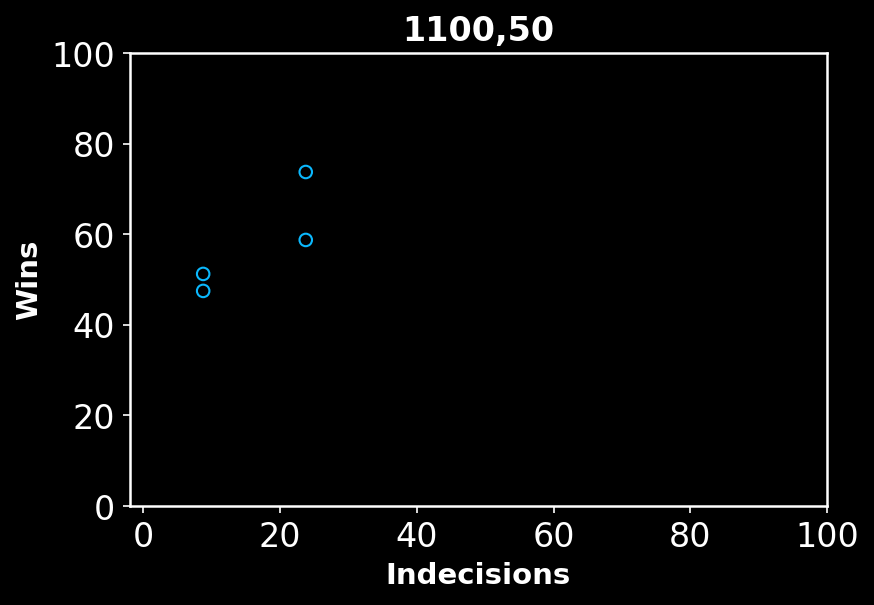

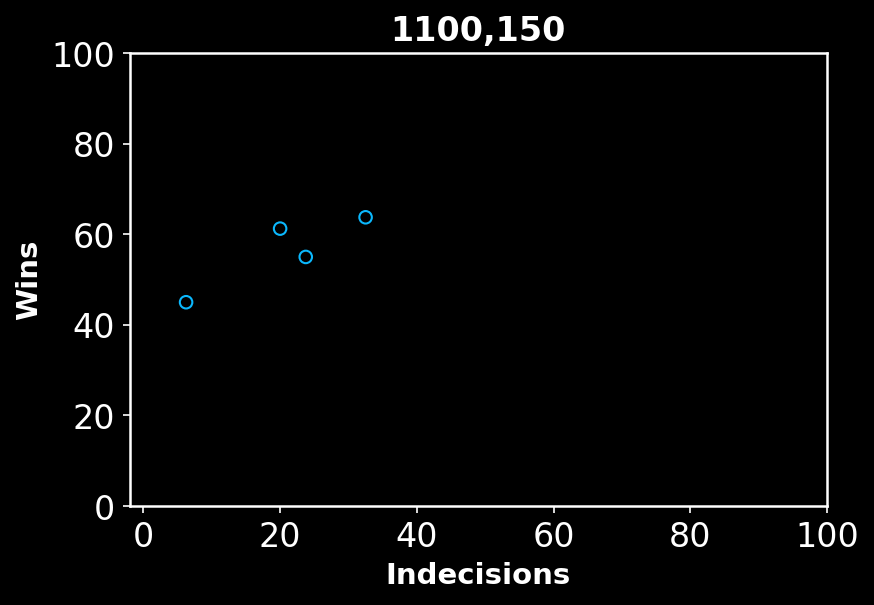

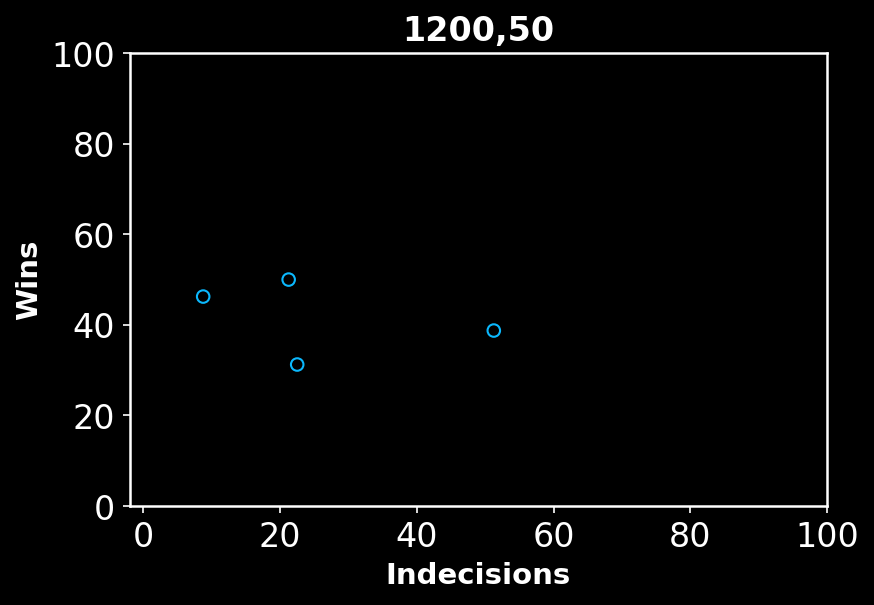

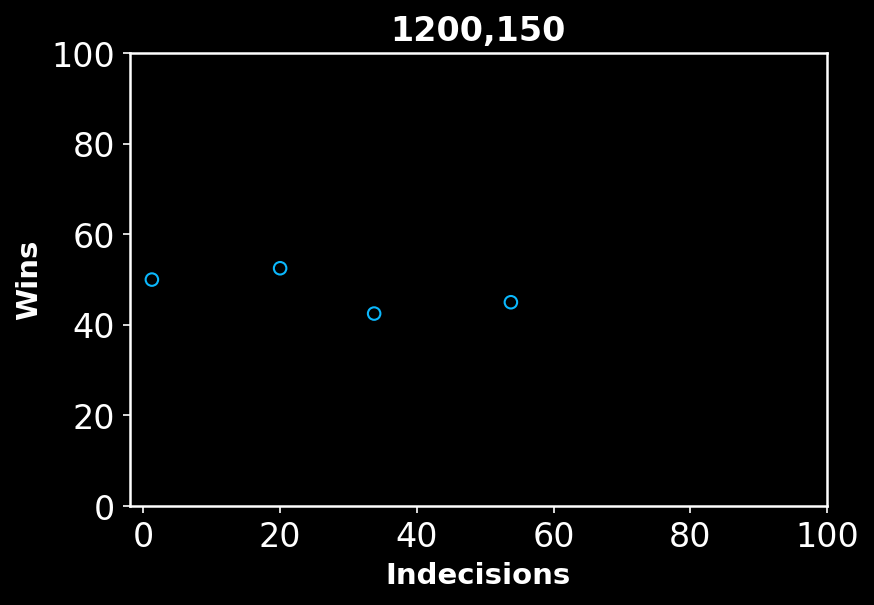

In [ ]:
for j in range(num_blocks):
    fig,ax = plt.subplots(dpi = 150)
    ax.scatter(perc_player_indecisions[:,j], perc_player_wins[:,j], facecolor='none', edgecolors=wheel.rak_blue)
    ax.set_xlabel('Indecisions')
    ax.set_ylabel('Wins')
    ax.set_xlim(-2,100)
    ax.set_ylim(0,100)
    ax.set_title(trial_block_titles[j])
    plt.show()

Reaction time and wins

(0.0, 100.0)

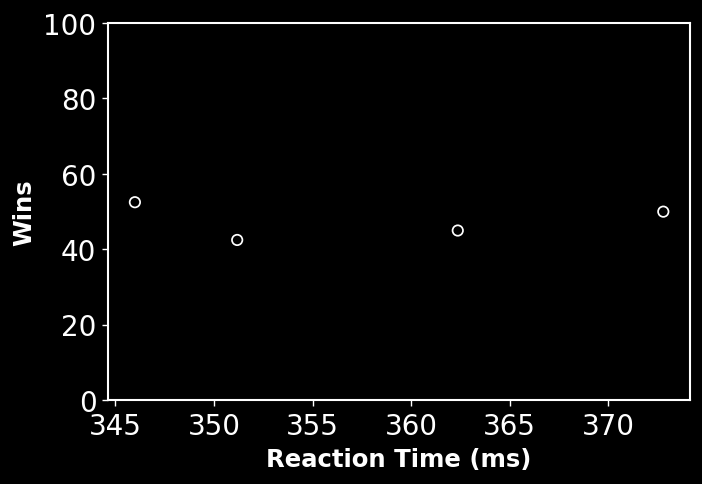

In [ ]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(reaction_time_mean, perc_player_wins[:,5], facecolor='none', edgecolors='white')
ax.set_xlabel('Reaction Time (ms)')
ax.set_ylabel('Wins')
ax.set_ylim(0,100)

Text(0, 0.5, 'Mean Decision Time')

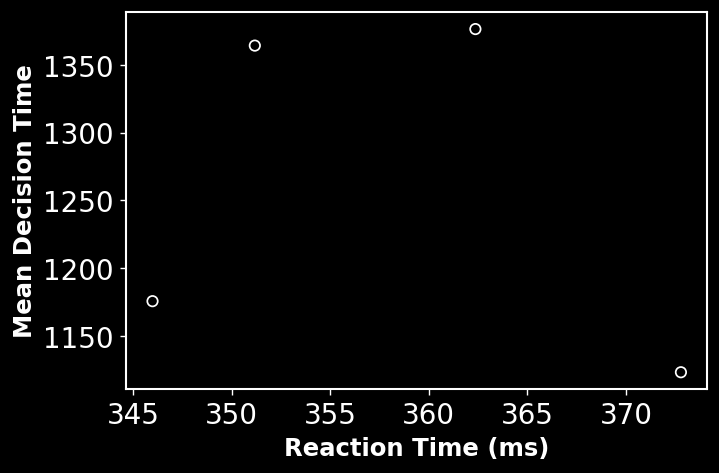

In [ ]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(reaction_time_mean, player_mean_decision_time[:,2], facecolor='none', edgecolors='white')
ax.set_xlabel('Reaction Time (ms)')
ax.set_ylabel('Mean Decision Time')


Gamble decision means and wins scatter

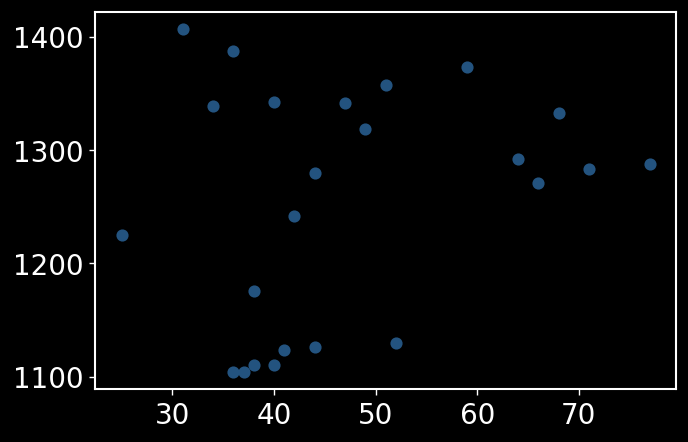

In [ ]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(player_wins, gamble_decision_time_means)

Reaction and Gamble percentages

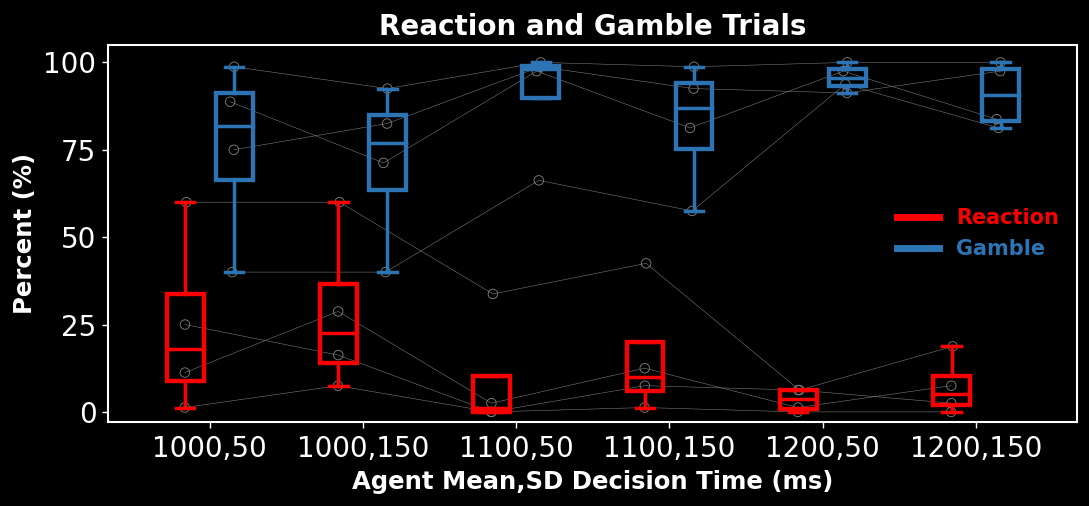

In [ ]:
#%% Plotting the number of reaction trials and number of gamble trials (percent) for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reactions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reactions.T, noise_scale=0.01, include_mean = False, circle_size=30)

boxplot(perc_gambles, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Percent (%)', title='Reaction and Gamble Trials')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gambles.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.set_ylim(-3,105)
ax.set_yticks(np.arange(0,101,25))
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction and gamble decision times boxplot side by side

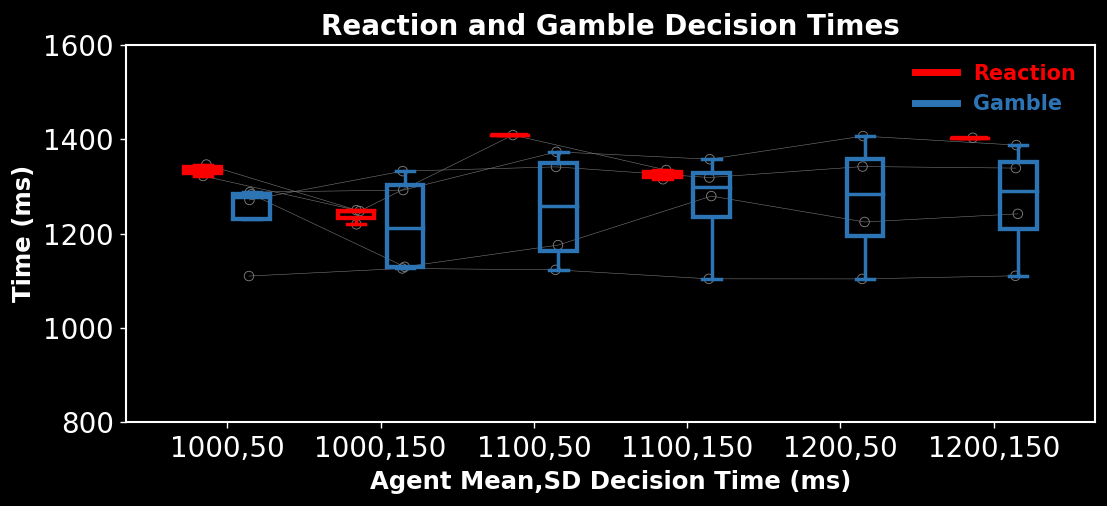

In [ ]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,2000,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(reaction_decision_time_means, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=reaction_decision_time_means.T, noise_scale=0.01, include_mean = False, circle_size=30)

boxplot(gamble_decision_time_means, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='Reaction and Gamble Decision Times')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=gamble_decision_time_means.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_ylim(800,1600)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Gamble and reaction wins 

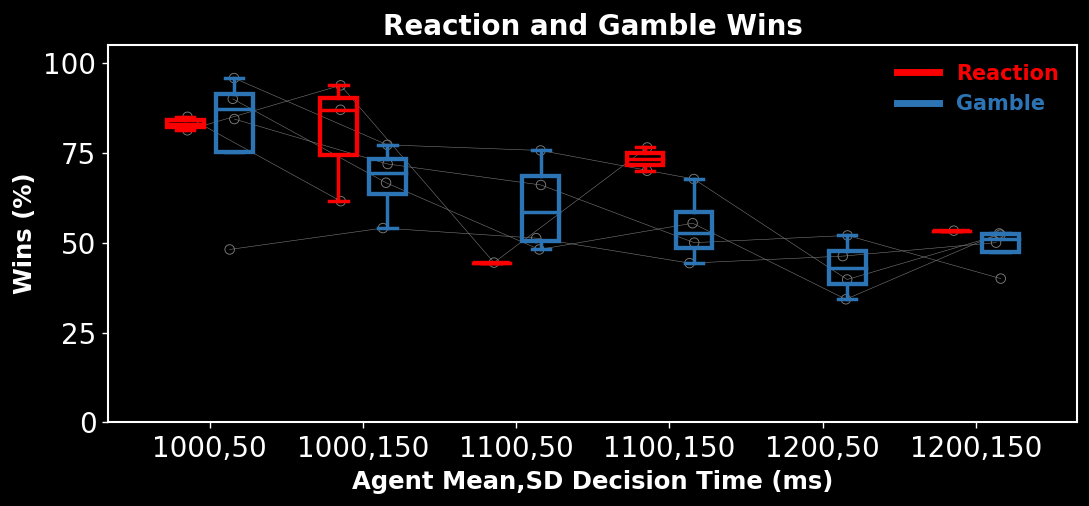

In [ ]:
# Out of x number of reaction trials, this percentage was how many they won (same for gambles)
# So it's  percent = reaction_wins/total_reaction_trials
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_wins, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reaction_wins.T, noise_scale=0.01, include_mean = False, circle_size=30)

boxplot(perc_gamble_wins, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title='Reaction and Gamble Wins')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gamble_wins.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.set_ylim(0,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

## !!!!! THIS PLOT SHOWS PEOPLE ARE MODULATING THEIR REACTION TIME BASED ON CONDITION.... IF GAMBLE WINS IS HIGHER FOR 1200 than 1100 and 1000, then they must be reacting FASTER !!!!!


Reaction and Gamble Indecisions

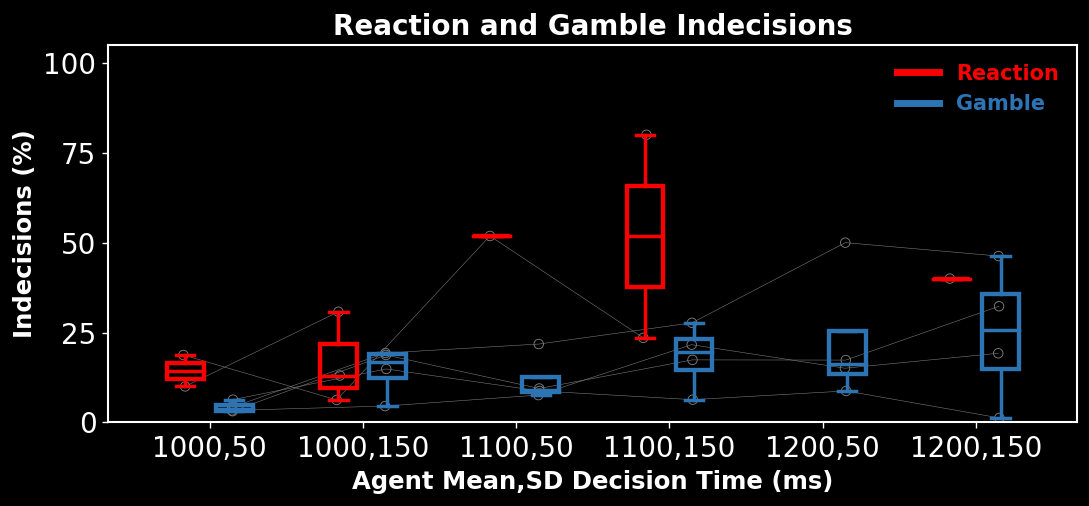

In [ ]:
# Percent = reaction indecisions / total Reaction trials
# !!!!!!!! WHEN THEY REACTED, HOW OFTEN DID THEY MAKE AN INDECISION
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_indecisions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_reaction_indecisions.T, noise_scale=0.01, include_mean = False, circle_size=30)

boxplot(perc_gamble_indecisions, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Indecisions (%)', title='Reaction and Gamble Indecisions')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=perc_gamble_indecisions.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_ylim(0,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Reaction and Gamble Incorrects

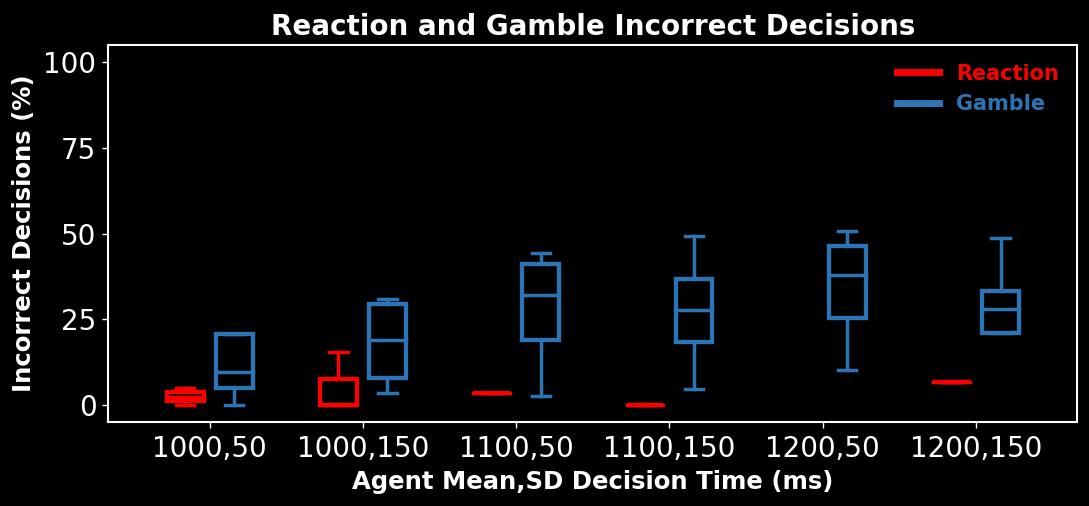

In [ ]:
# reaction incorrect decisions / total reaction trials
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_incorrects, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(perc_gamble_incorrects, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Incorrect Decisions (%)', title='Reaction and Gamble Incorrect Decisions')
ax.set_ylim(-5,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()




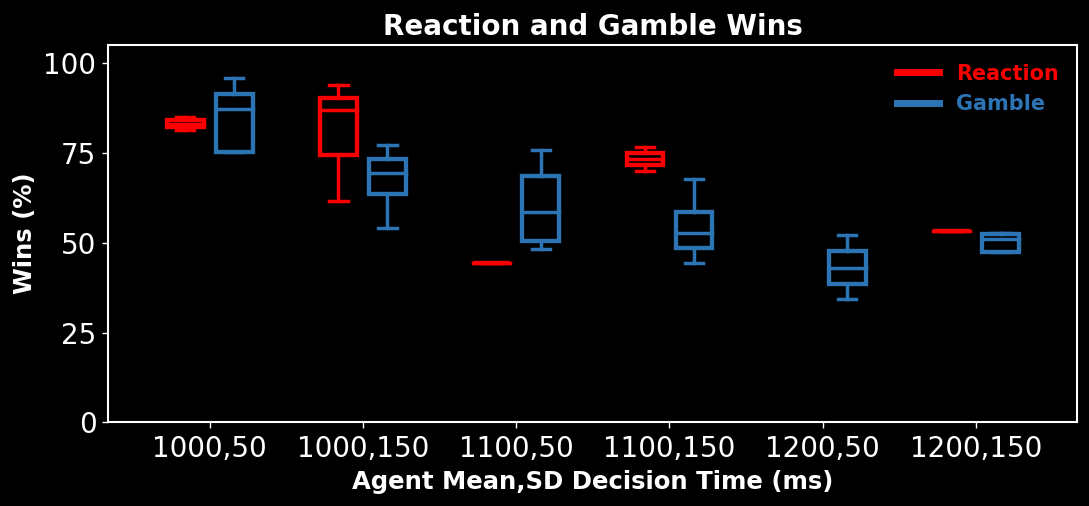

In [ ]:
# this is relative to the total number of reactions and gambles
# !!!! WHEN THEY REACTED OR GAMBLED, HOW OFTEN DID THEY WIN

xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_reaction_wins, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(perc_gamble_wins, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title='Reaction and Gamble Wins')
ax.set_ylim(0,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Out of total wins, indecisions, etc.... how many were gamble and how many were reaction 

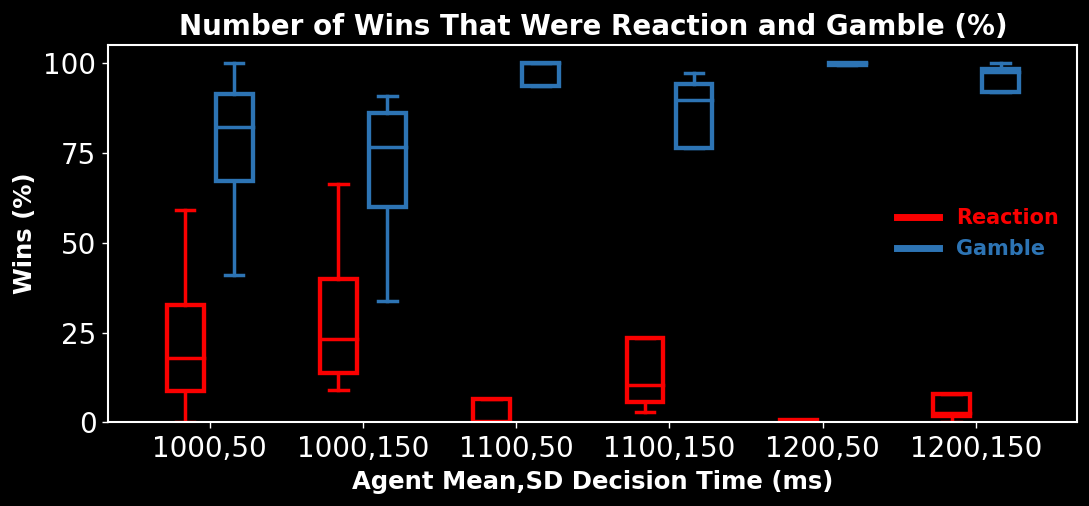

In [ ]:
# OUT OF THEIR TOTAL WINS, HOW MANY WERE REACTION AND GAMBLE
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_wins_that_were_reactions, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(perc_wins_that_were_gambles, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"],xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title='Number of Wins That Were Reaction and Gamble (%)')
ax.set_ylim(0,105)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Agent Decision Time on Gambles vs Reaction

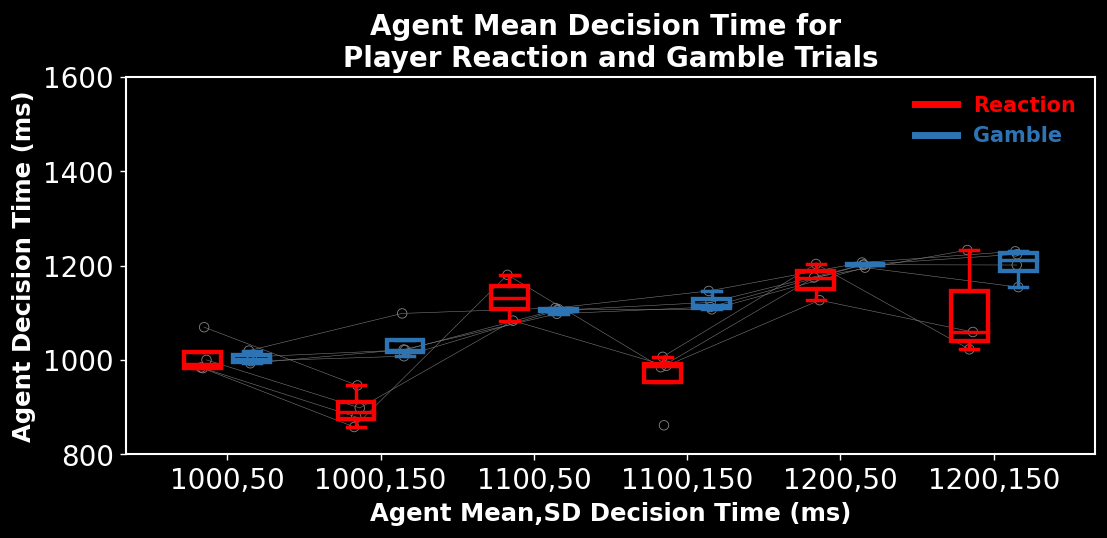

In [ ]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,2000,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(agent_task_decision_time_reaction_means, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=agent_task_decision_time_reaction_means.T, noise_scale=0.01, include_mean = False, circle_size=30)

boxplot(agent_task_decision_time_gamble_means, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Agent Decision Time (ms)', title='Agent Mean Decision Time for \nPlayer Reaction and Gamble Trials')
dv.jitter_array(ax=ax,x_positions=xlocs+0.15,data_list=agent_task_decision_time_gamble_means.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_ylim(800,1600)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Player-Agent Decision Time Boxplot

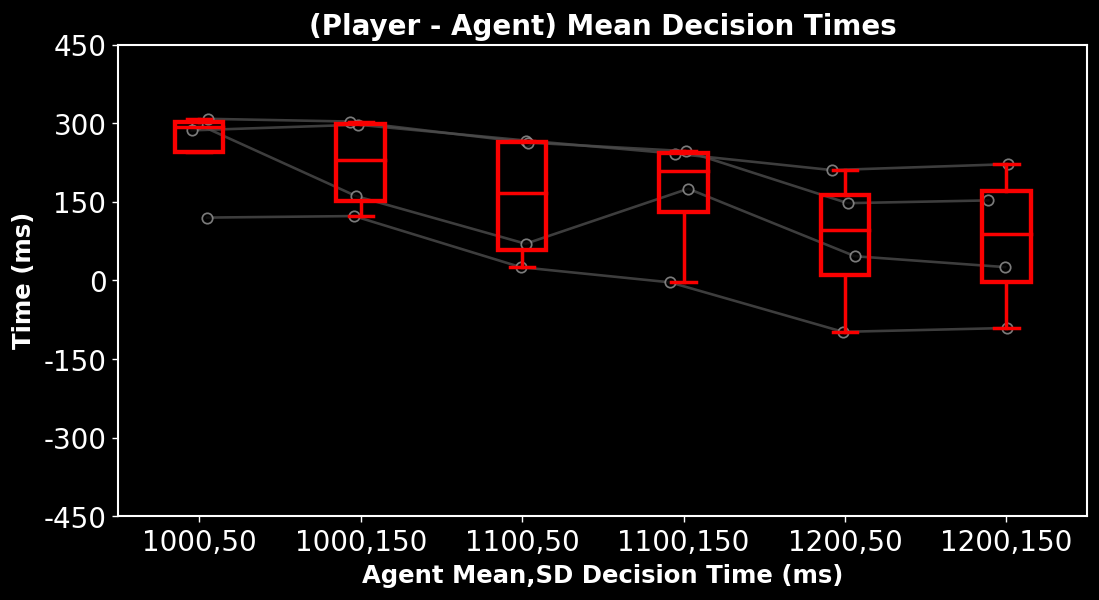

In [ ]:
#%% Average difference in agent target left time and player target left time for each condition 
# It's not so much the average reach time that matters as much as the difference between the agent and the player
# This is an indicator of gambling for each state
mean_diff_decision_time = player_mean_decision_time- agent_mean_decision_time 
xlocs = np.arange(0, num_blocks)
ylocs  = np.arange(-450,500,150)
plt.figure(dpi = 125, figsize = (10,5))
ax = plt.subplot()
boxplot(mean_diff_decision_time,xlocs = xlocs, ylocs = ylocs, box_widths=0.05, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='(Player - Agent) Mean Decision Times')
ax.plot(jitter(xlocs, mean_diff_decision_time).T,mean_diff_decision_time.T, marker = 'o',markerfacecolor = dot_color, markeredgecolor = '0.6', color='0.3', alpha = 0.8,zorder=1 )
ax.set_xticklabels(trial_block_titles)
ax.set_yticks(ylocs)
ax.set_yticklabels(ylocs)
#plt.savefig(PATH+SAVE_PATH+'agent_player_diff_mean_decision_time', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

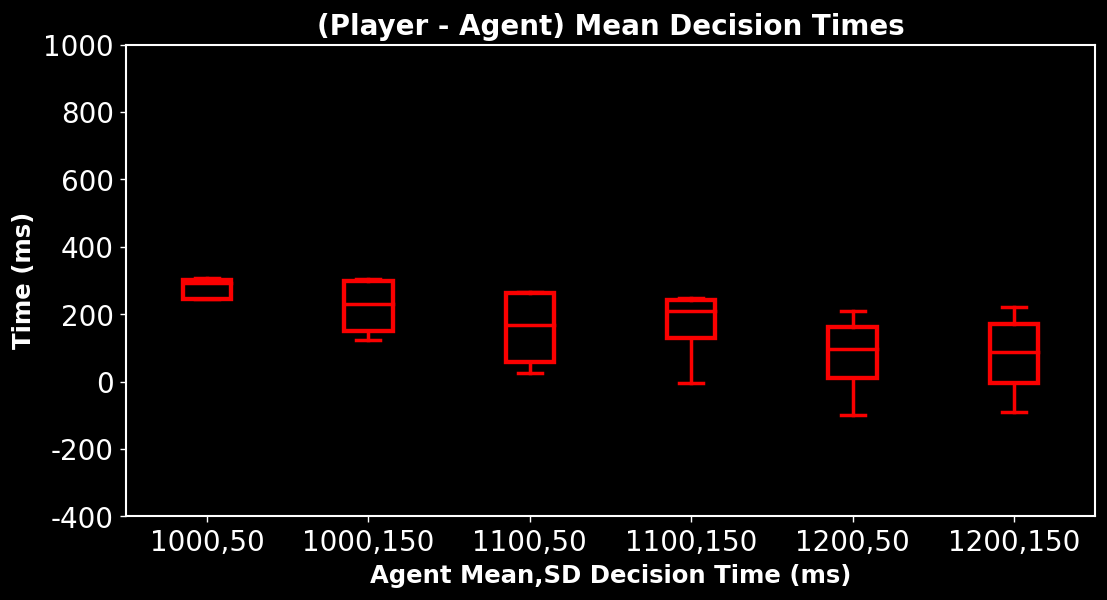

In [ ]:
#%% Average difference in agent target left time and player target left time for each condition 
# It's not so much the average reach time that matters as much as the difference between the agent and the player
# This is an indicator of gambling for each state
mean_diff_decision_time = player_mean_decision_time - agent_mean_decision_time
xlocs = np.arange(0, num_blocks)
ylocs  = np.arange(-400,1200,200)
plt.figure(dpi = 125, figsize = (10,5))
ax = plt.subplot()
boxplot(mean_diff_decision_time,xlocs = xlocs, ylocs = ylocs, box_widths=0.05, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='(Player - Agent) Mean Decision Times')

ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'agent_player_diff_mean_decision_time_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Agent - Player Decision Time Scatter

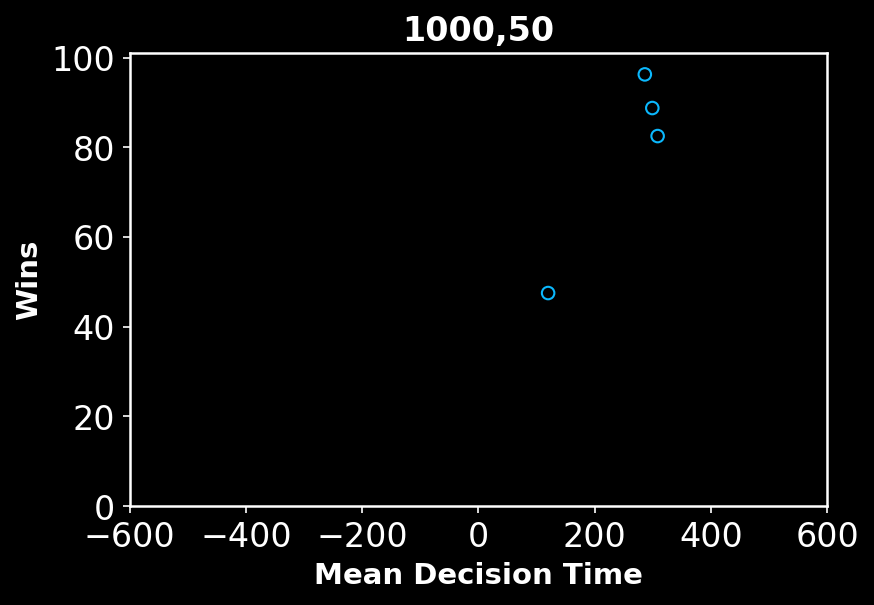

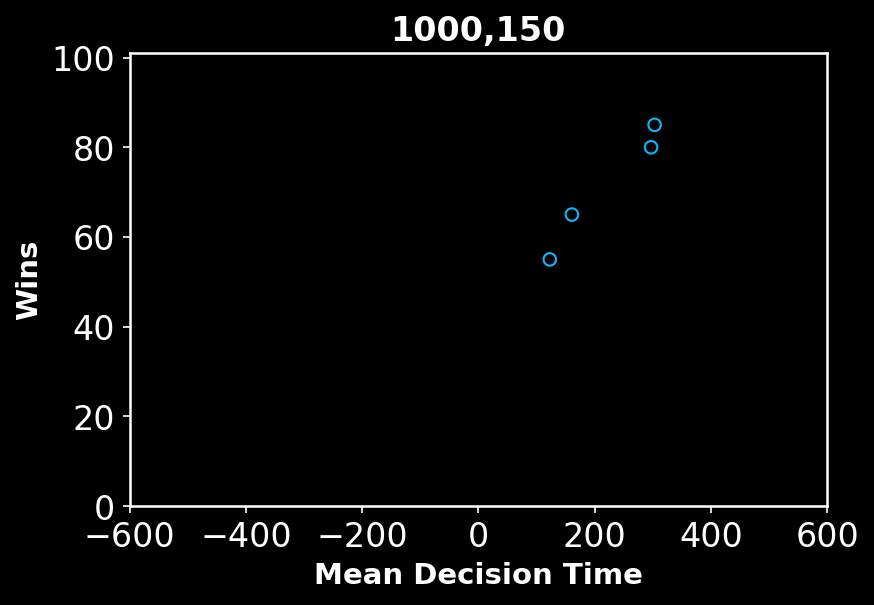

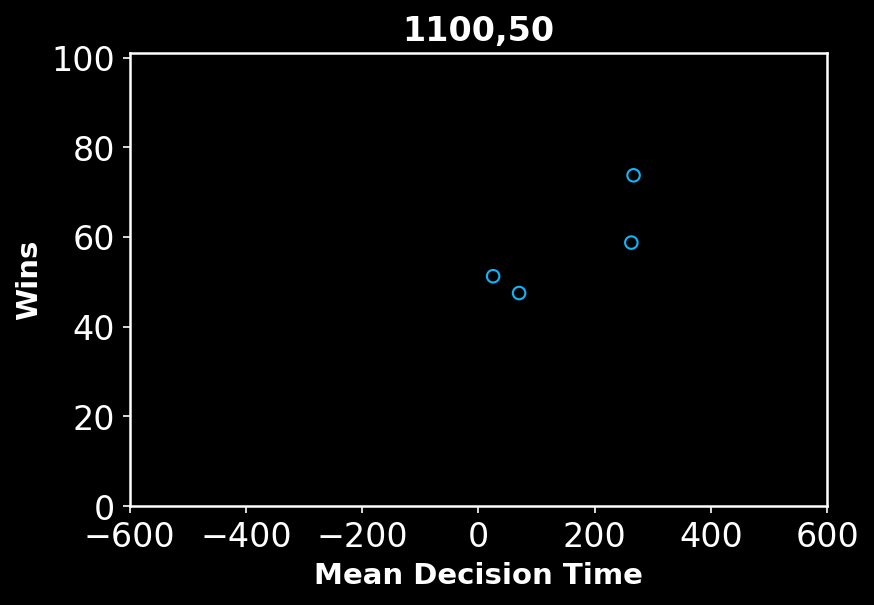

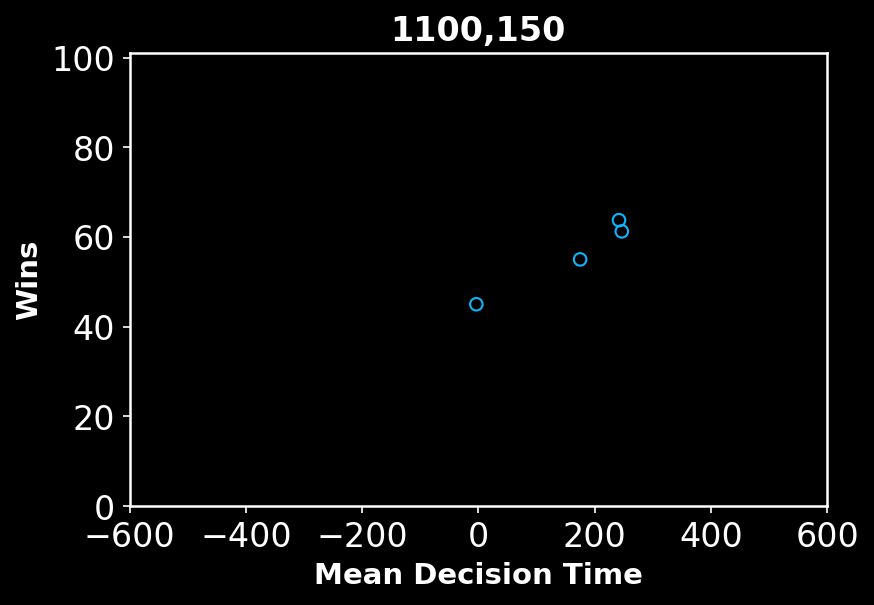

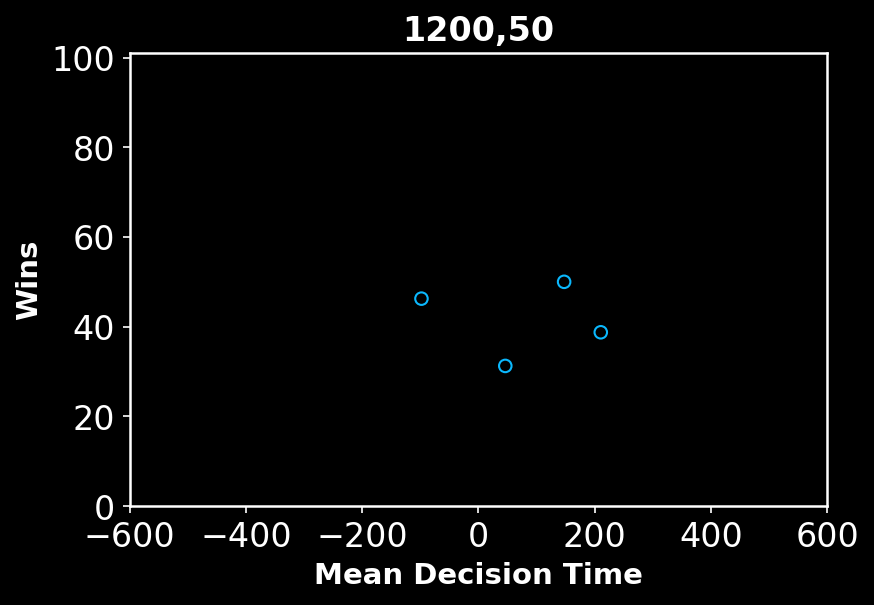

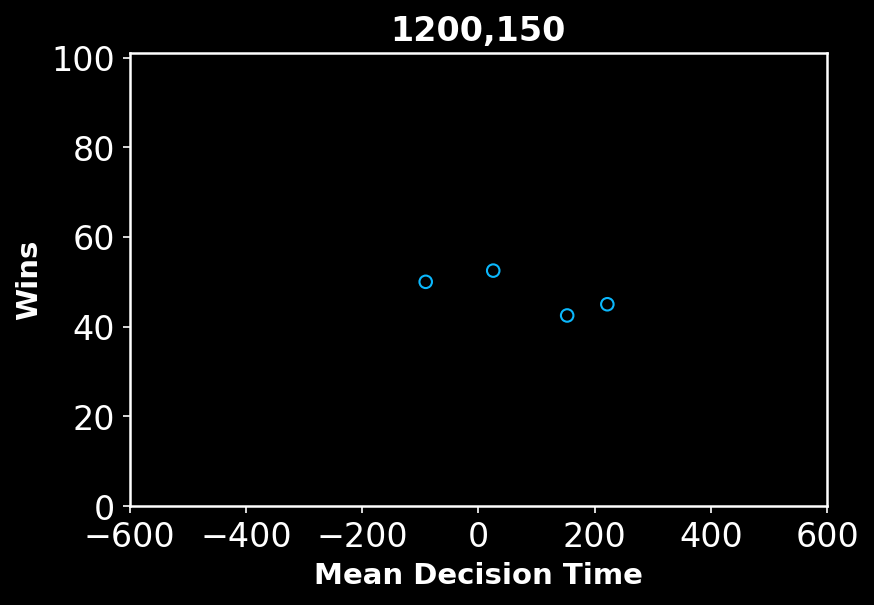

In [ ]:
for j in range(num_blocks):
    fig,ax = plt.subplots(dpi = 150)
    ax.scatter(mean_diff_decision_time[:,j], perc_player_wins[:,j], facecolor='none', edgecolors=wheel.rak_blue)
    ax.set_xlabel('Mean Decision Time')
    ax.set_ylabel('Wins')
    ax.set_xlim(-600,600)
    ax.set_ylim(0,101)
    ax.set_title(trial_block_titles[j])
    plt.show()

In [ ]:
player_wins


array([[38., 44., 41., 36., 37., 40.],
       [71., 52., 38., 44., 25., 42.],
       [77., 64., 59., 51., 31., 36.],
       [66., 68., 47., 49., 40., 34.]])

Binning metrics based on agent decision times

In [ ]:
#%% Bin agent left start times into 100ms chunks
# Find pLaer left start time and find mean for each of the chunks
# Reshape arrays to get all participants
# Compare across conditions
bins = np.arange(800,1400,50)
bin_length_each_subject_each_condition = np.zeros((len(bins)-1,num_subjects,num_blocks))
bin_length_each_condition = np.zeros((len(bins)-1,num_blocks))
binned_player_task_decision_times = np.zeros((len(bins)-1,num_subjects,num_blocks,num_trials))*np.nan 
binned_player_target_selection = np.zeros((len(bins)-1,num_subjects,num_blocks,num_trials))*np.nan 
binned_agent_task_decision_times = np.zeros((len(bins)-1,num_subjects,num_blocks,num_trials))*np.nan 
binned_player_minus_agent_task_decision_time = np.zeros((len(bins)-1,num_subjects,num_blocks,num_trials))*np.nan 
binned_agent_task_decision_array = np.zeros((len(bins)-1,num_subjects,num_blocks,num_trials))*np.nan 
binned_player_wins = np.zeros((len(bins)-1,num_subjects,num_blocks))
binned_player_indecisions = np.zeros((len(bins)-1,num_subjects,num_blocks))
binned_player_incorrects = np.zeros((len(bins)-1,num_subjects,num_blocks))
mean_binned_player_wins = np.zeros((len(bins)-1,num_blocks))
mean_binned_player_indecisions = np.zeros((len(bins)-1,num_blocks))
mean_binned_player_incorrects = np.zeros((len(bins)-1,num_blocks))


for b in range(len(bins)-1):
    bin_index = np.argwhere((bins[b] < agent_task_decision_time) & (agent_task_decision_time < bins[b+1]))# and agent_task_decision_time < bins[b+1])
    for i,j,k in bin_index:
        c+=1
        bin_length_each_subject_each_condition[b,i,j]+=1
        bin_length_each_condition[b,j]+=1
        binned_player_task_decision_times[b,i,j,k] = player_task_decision_time[i,j,k] 
        binned_player_target_selection[b,i,j,k] = player_task_decision_array[i,j,k]
        binned_agent_task_decision_times[b,i,j,k] = agent_task_decision_time[i,j,k]
        binned_agent_task_decision_array[b,i,j,k] = agent_decision_array[i,j,k]
        if ((player_task_decision_array[i,j,k]*agent_decision_array[i,j,k] == 1) or (player_task_decision_array[i,j,k] != 0 and agent_decision_array[i,j,k] == 0)):
            binned_player_wins[b,i,j] += 1
        if player_task_decision_array[i,j,k] == 0:
            binned_player_indecisions[b,i,j] += 1
        if (player_task_decision_array[i,j,k]*agent_decision_array[i,j,k] == -1):
            binned_player_incorrects[b,i,j] += 1
    binned_player_minus_agent_task_decision_time[b,:,:,:] = binned_player_task_decision_times[b,:,:,:] - binned_agent_task_decision_times[b,:,:,:]  
    
    
    
mean_of_each_bin_each_subject_each_condition = np.zeros((len(bins)-1,num_subjects,num_blocks))
# Get percentages of the bin size
perc_binned_player_wins = binned_player_wins/bin_length_each_subject_each_condition*100
perc_binned_player_indecisions = binned_player_indecisions/bin_length_each_subject_each_condition*100
perc_binned_player_incorrects = binned_player_incorrects/bin_length_each_subject_each_condition*100

# Calculate mean across all trials
mean_decision_time_of_each_bin_each_subject_each_condition = np.nanmean(binned_player_task_decision_times, axis = 3)
mean_decision_time_of_each_bin_each_condition = np.nanmean(mean_decision_time_of_each_bin_each_subject_each_condition, axis = 1 )
mean_player_minus_agent_task_decision_time_each_bin_each_subject_each_condition = np.nanmean(binned_player_minus_agent_task_decision_time, axis = 3)
mean_player_minus_agent_task_decision_time_each_bin_each_condition = np.nanmean(mean_player_minus_agent_task_decision_time_each_bin_each_subject_each_condition,axis=1)
# Calculate mean across all subjects
mean_perc_binned_player_wins = np.nanmean(perc_binned_player_wins, axis = 1)
mean_perc_binned_player_indecisions = np.nanmean(perc_binned_player_indecisions, axis = 1)
mean_perc_binned_player_incorrects = np.nanmean(perc_binned_player_incorrects, axis = 1)

# If I want to cut it off (for each condition having greater than 10 across all subjects... not sure which one I want)
n=50
mask = bin_length_each_condition>n
mean_perc_binned_player_wins = mean_perc_binned_player_wins*mask
mean_perc_binned_player_indecisions = mean_perc_binned_player_indecisions*mask
mean_perc_binned_player_incorrects = mean_perc_binned_player_incorrects*mask
mean_player_minus_agent_task_decision_time_each_bin_each_condition = mean_player_minus_agent_task_decision_time_each_bin_each_condition*mask
mean_decision_time_of_each_bin_each_condition = mean_decision_time_of_each_bin_each_condition*mask


C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_25064\3449333922.py:43: RuntimeWarning: invalid value encountered in true_divide
  perc_binned_player_wins = binned_player_wins/bin_length_each_subject_each_condition*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_25064\3449333922.py:44: RuntimeWarning: invalid value encountered in true_divide
  perc_binned_player_indecisions = binned_player_indecisions/bin_length_each_subject_each_condition*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_25064\3449333922.py:45: RuntimeWarning: invalid value encountered in true_divide
  perc_binned_player_incorrects = binned_player_incorrects/bin_length_each_subject_each_condition*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_25064\3449333922.py:48: RuntimeWarning: Mean of empty slice
  mean_decision_time_of_each_bin_each_subject_each_condition = np.nanmean(binned_player_task_decision_times, axis = 3)
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_25064\3449333922.py:49

Agent Decision Time vs. Win Percentage

Binned win percentage

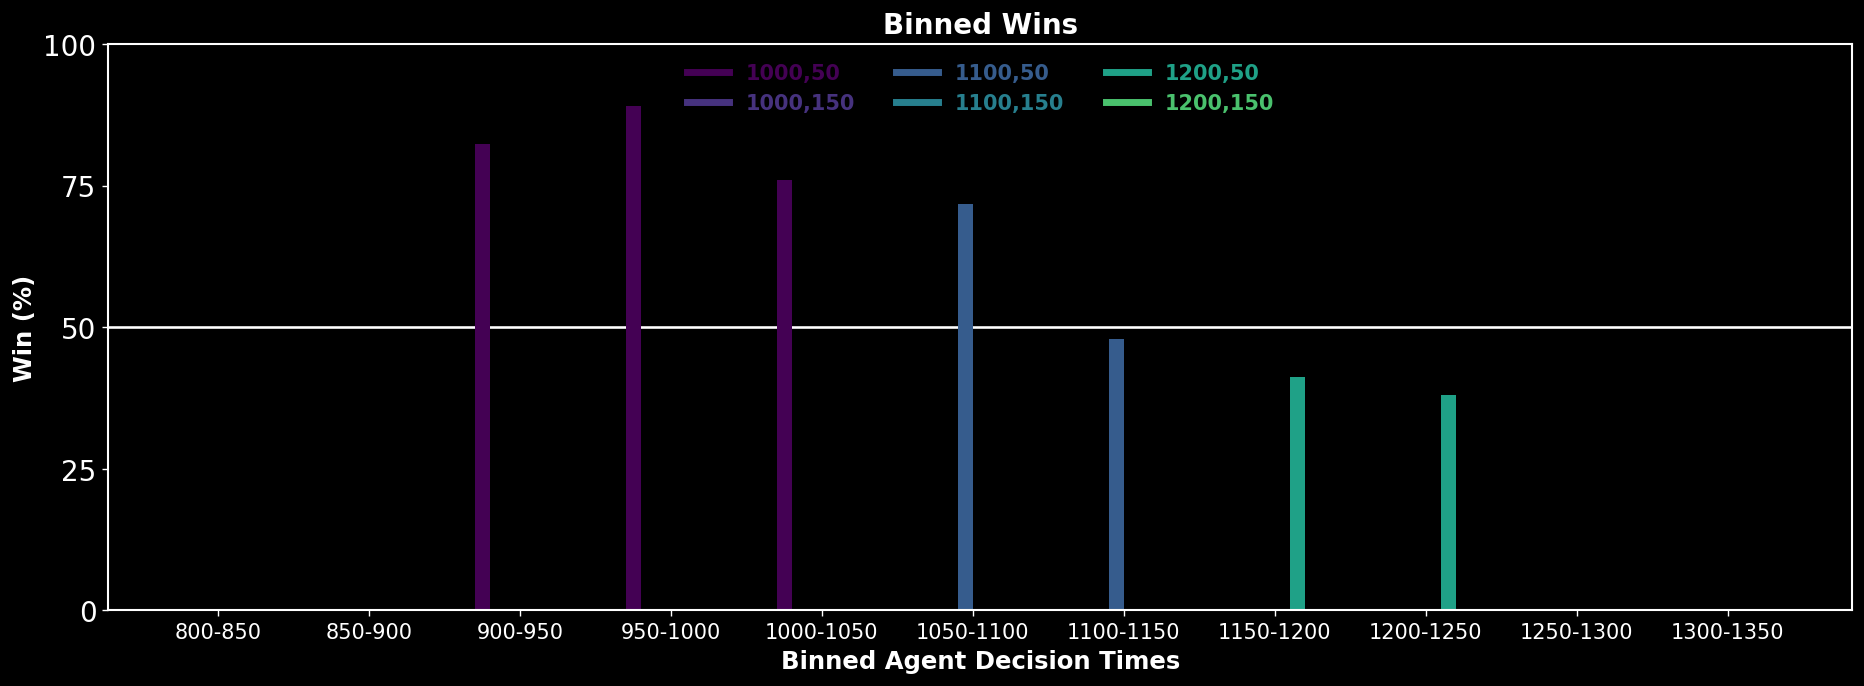

In [ ]:
xticklabs = []
for i in range(len(bins)-1):
    xticklabs.append(f'{bins[i]}-{bins[i+1]}')
xlocs = np.arange(len(bins)-1)
width = 0.1

color = plt.cm.viridis(np.linspace(0, 1, 8))
plt.figure(dpi = 125, figsize = (18,6))
ax = plt.subplot()
ax.axhline(y=50,c='white', zorder=0)
ax.bar(xlocs - width*2.5, mean_perc_binned_player_wins[:,0], width=width, color=color[0])
ax.bar(xlocs - width*1.5, mean_perc_binned_player_wins[:,1], width=width, color=color[1])
ax.bar(xlocs - width*0.5, mean_perc_binned_player_wins[:,2], width=width, color=color[2])
ax.bar(xlocs + width*0.5, mean_perc_binned_player_wins[:,3], width=width, color=color[3])
ax.bar(xlocs + width*1.5, mean_perc_binned_player_wins[:,4], width=width, color=color[4])
ax.bar(xlocs + width*2.5, mean_perc_binned_player_wins[:,5], width=width, color=color[5])
ax.set_xticks(xlocs)
ax.set_xticklabels(xticklabs, fontsize = 12)
ax.set_yticks(np.arange(0,110,25))
ax.set_ylabel('Win (%)')
ax.set_xlabel('Binned Agent Decision Times')
ax.set_title('Binned Wins')
labels = trial_block_titles
dv.Custom_Legend(ax, labels, color[:6], fontsize = 12,ncol=3,columnspacing=2, loc='upper center')
#plt.savefig(PATH+SAVE_PATH+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

# People modulate reaction time effort? Shown in the fact that win percentage is higher on early bins for 1200 condition
# People seem to be 

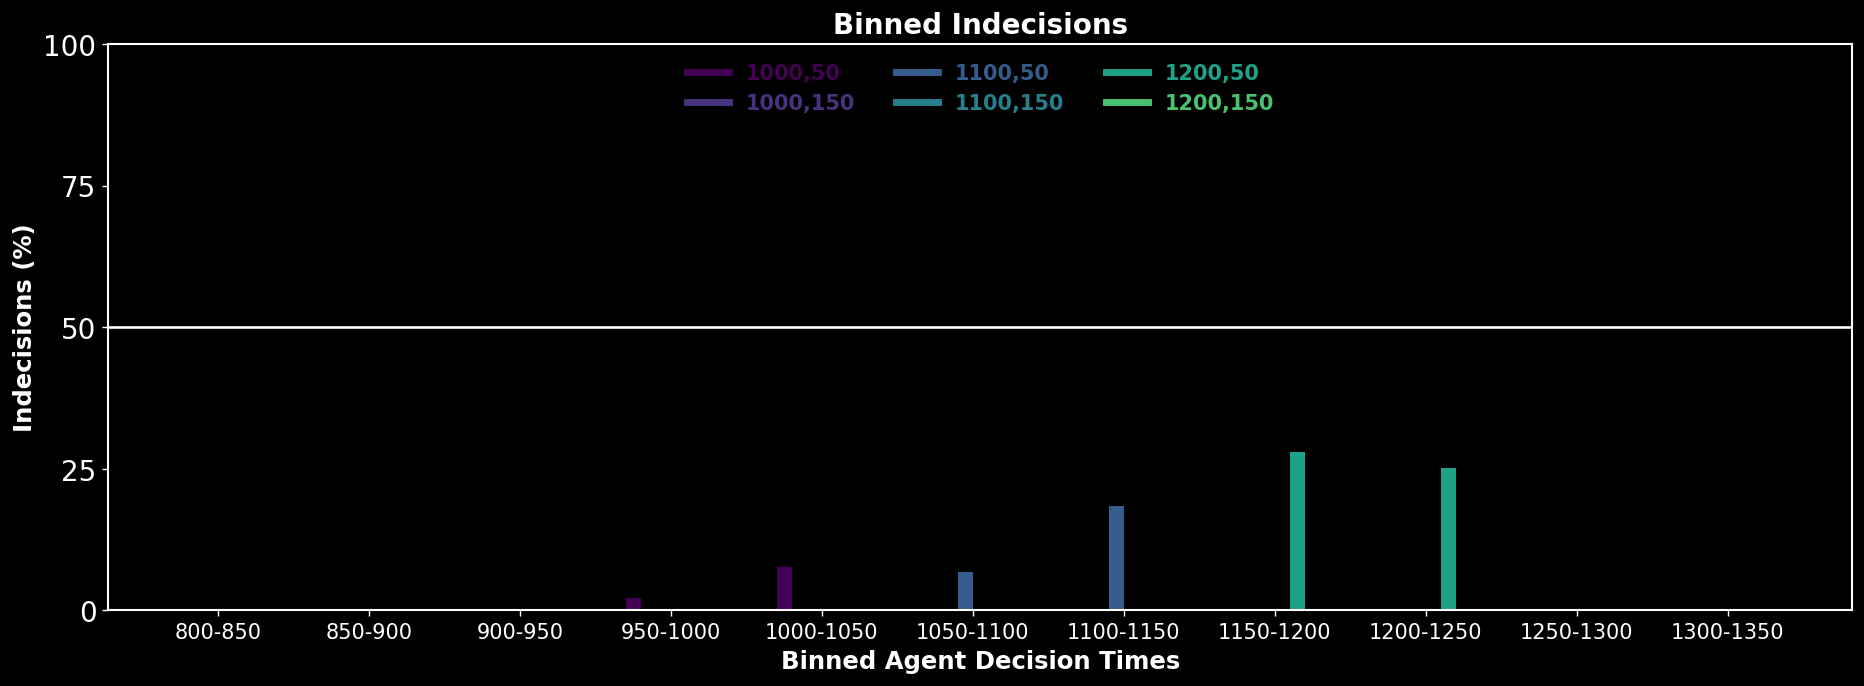

In [ ]:
xticklabs = []
for i in range(len(bins)-1):
    xticklabs.append(f'{bins[i]}-{bins[i+1]}')
xlocs = np.arange(len(bins)-1)
width = 0.1

color = plt.cm.viridis(np.linspace(0, 1, 8))
plt.figure(dpi = 125, figsize = (18,6))
ax = plt.subplot()
ax.axhline(y=50,c='white', zorder=0)
ax.bar(xlocs - width*2.5, mean_perc_binned_player_indecisions[:,0], width=width, color=color[0])
ax.bar(xlocs - width*1.5, mean_perc_binned_player_indecisions[:,1], width=width, color=color[1])
ax.bar(xlocs - width*0.5, mean_perc_binned_player_indecisions[:,2], width=width, color=color[2])
ax.bar(xlocs + width*0.5, mean_perc_binned_player_indecisions[:,3], width=width, color=color[3])
ax.bar(xlocs + width*1.5, mean_perc_binned_player_indecisions[:,4], width=width, color=color[4])
ax.bar(xlocs + width*2.5, mean_perc_binned_player_indecisions[:,5], width=width, color=color[5])
ax.set_xticks(xlocs)
ax.set_xticklabels(xticklabs, fontsize = 12)
ax.set_yticks(np.arange(0,110,25))
ax.set_ylabel('Indecisions (%)')
ax.set_xlabel('Binned Agent Decision Times')
ax.set_title('Binned Indecisions')
labels = trial_block_titles
dv.Custom_Legend(ax, labels, color[:6], fontsize = 12,ncol=3,columnspacing=2, loc='upper center')
#plt.savefig(PATH+SAVE_PATH+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

# Out of all the agent reach times in teh 1250-1300, for condition 1100,50

Binned Decision Times Across Subjects

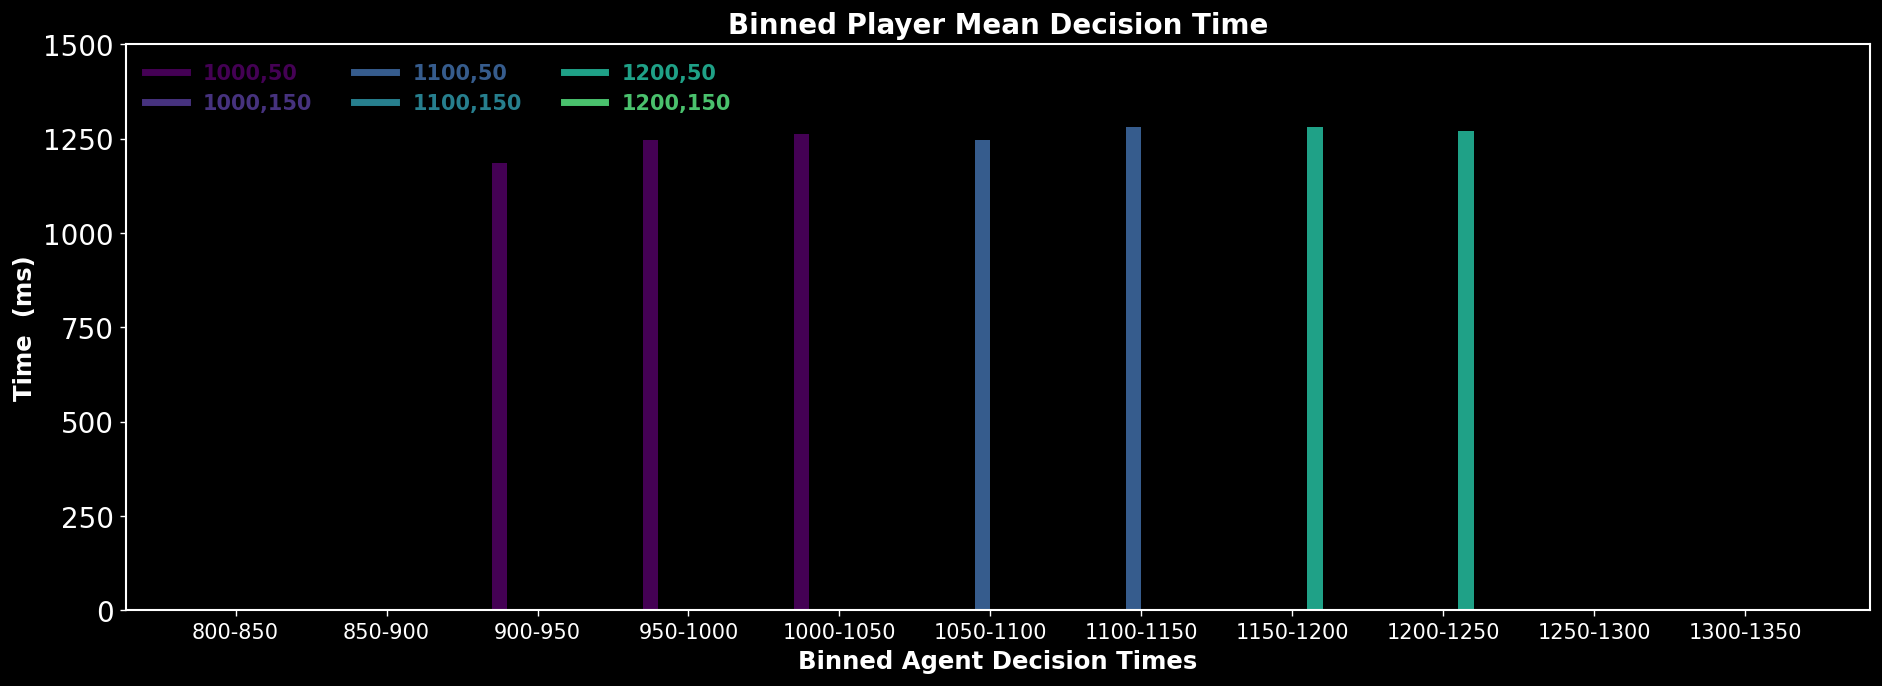

In [ ]:
xticklabs = []
for i in range(len(bins)-1):
    xticklabs.append(f'{bins[i]}-{bins[i+1]}')
xlocs = np.arange(len(bins)-1)
width = 0.1

color = plt.cm.viridis(np.linspace(0, 1, 8))
plt.figure(dpi = 125, figsize = (18,6))
ax = plt.subplot()
ax.bar(xlocs - width*2.5, mean_decision_time_of_each_bin_each_condition[:,0], width=width, color=color[0])
ax.bar(xlocs - width*1.5, mean_decision_time_of_each_bin_each_condition[:,1], width=width, color=color[1])
ax.bar(xlocs - width*0.5, mean_decision_time_of_each_bin_each_condition[:,2], width=width, color=color[2])
ax.bar(xlocs + width*0.5, mean_decision_time_of_each_bin_each_condition[:,3], width=width, color=color[3])
ax.bar(xlocs + width*1.5, mean_decision_time_of_each_bin_each_condition[:,4], width=width, color=color[4])
ax.bar(xlocs + width*2.5, mean_decision_time_of_each_bin_each_condition[:,5], width=width, color=color[5])
ax.set_xticks(xlocs)
ax.set_xticklabels(xticklabs, fontsize = 12)
ax.set_yticks(np.arange(0,1700,250))
ax.set_ylabel('Time  (ms)')
ax.set_xlabel('Binned Agent Decision Times')
ax.set_title('Binned Player Mean Decision Time')
labels = trial_block_titles
dv.Custom_Legend(ax, labels, color[:6], fontsize = 12,ncol=3, columnspacing=2, loc='upper left')
#plt.savefig(PATH+SAVE_PATH+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

# Out of all the agent reach times in teh 1250-1300, for condition 1100,50

Agent-Player Decision Time

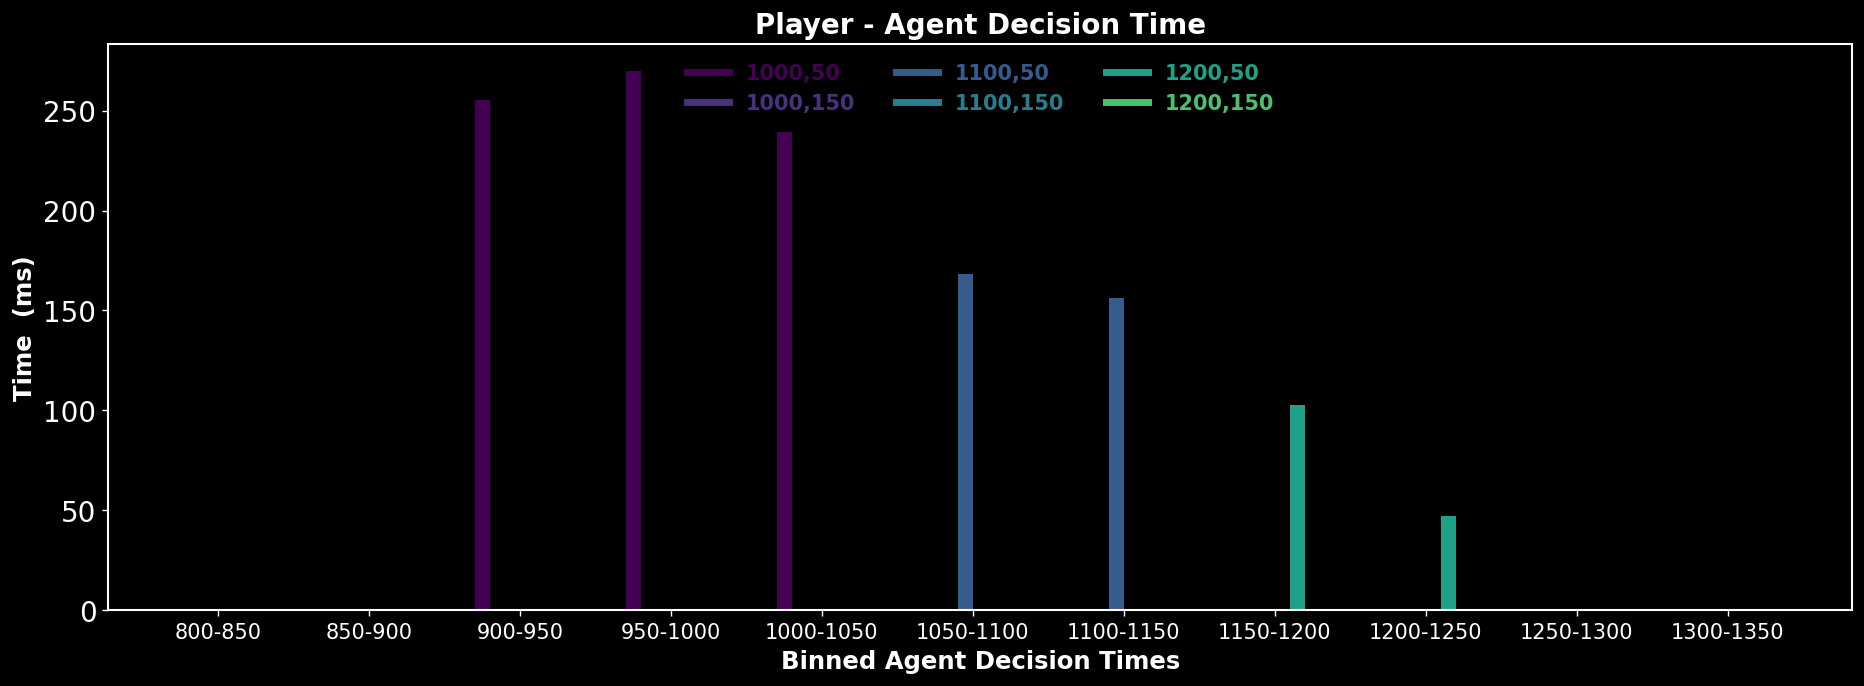

In [ ]:
xticklabs = []
for i in range(len(bins)-1):
    xticklabs.append(f'{bins[i]}-{bins[i+1]}')
xlocs = np.arange(len(bins)-1)
width = 0.1

color = plt.cm.viridis(np.linspace(0, 1, 8))
plt.figure(dpi = 125, figsize = (18,6))
ax = plt.subplot()
ax.axhline(y=0,c='white', zorder=10)
ax.bar(xlocs - width*2.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,0], width=width, color=color[0])
ax.bar(xlocs - width*1.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,1], width=width, color=color[1])
ax.bar(xlocs - width*0.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,2], width=width, color=color[2])
ax.bar(xlocs + width*0.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,3], width=width, color=color[3])
ax.bar(xlocs + width*1.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,4], width=width, color=color[4])
ax.bar(xlocs + width*2.5, mean_player_minus_agent_task_decision_time_each_bin_each_condition[:,5], width=width, color=color[5])
ax.set_xticks(xlocs)
ax.set_xticklabels(xticklabs, fontsize = 12)
#ax.set_yticks(np.arange(0,1700,250))
ax.set_ylabel('Time  (ms)')
ax.set_xlabel('Binned Agent Decision Times')
ax.set_title('Player - Agent Decision Time')
labels = trial_block_titles
dv.Custom_Legend(ax, labels, color[:6], fontsize = 12,ncol=3, columnspacing=2, loc='upper center')
#plt.savefig(PATH+SAVE_PATH+'binned_reach_times', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Binned boxplots

In [ ]:
# #%% Plot the above
# xticklabs = []
# for i in range(len(bins)-1):
#     xticklabs.append(f'{bins[i]}-{bins[i+1]}') 
# xlocs = np.arange(len(bins)-1)
# ylocs = np.arange(0,1800,200)
# width = 0.1
# cdict = {'red':   ((0.0,  0.22, 0.0),
#                    (0.5,  1.0, 1.0),
#                    (1.0,  0.89, 1.0)),

#          'green': ((0.0,  0.49, 0.0),
#                    (0.5,  1.0, 1.0),
#                    (1.0,  0.12, 1.0)),

#          'blue':  ((0.0,  0.72, 0.0),
#                    (0.5,  0.0, 0.0),
#                    (1.0,  0.11, 1.0))}

# color = plt.cm.viridis(np.linspace(0, 1, 8))
# plt.figure(dpi = 125, figsize = (18,6))
# ax = plt.subplot()
# boxplot(binned_player_task_decision_times[0,:,:], xlocs-width*2.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# boxplot(binned_player_task_decision_times[1,:,:], xlocs-width*1.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# boxplot(binned_player_task_decision_times[2,:,:], xlocs-width*0.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# boxplot(binned_player_task_decision_times[3,:,:], xlocs+width*0.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# boxplot(binned_player_task_decision_times[4,:,:], xlocs+width*1.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# boxplot(binned_player_task_decision_times[5,:,:], xlocs+width*2.5, ylocs, box_widths=0.007, xlab = "Agent Mean Reach Time (ms)",
#         ylab='Time (ms)', title='Mean Decision Times on Gambles')
# #ax.scatter(jitter(xlocs, binned_player_task_decision_times[0,:,:].T),binned_player_task_decision_times[0,:,:].T, facecolor = 'none', edgecolors='0.6' )# ax.boxplot(mean_of_each_condition_each_bin[0,:],positions = xlocs - width*2.5)
# # ax.boxplot(mean_of_each_condition_each_bin[2,:],positions = xlocs - width*0.5)
# # ax.boxplot(mean_of_each_condition_each_bin[3,:],positions = xlocs + width*0.5,)
# # ax.boxplot(mean_of_each_condition_each_bin[4,:],positions = xlocs + width*1.5,)
# # ax.boxplot(mean_of_each_condition_each_bin[5,:],positions = xlocs + width*2.5)
# ax.set_xticks(xlocs)
# ax.set_xticklabels(xticklabs)
# labels = trial_block_titles
# dv.Custom_Legend(ax, labels, color[:6], fontsize = 12, loc='upper left')
# plt.tight_layout()

Scatter Plots

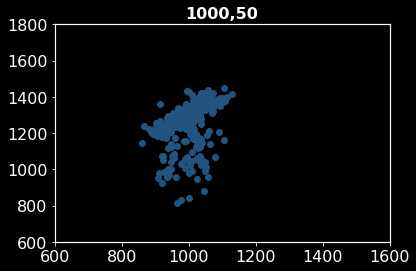

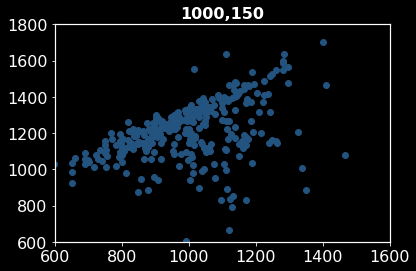

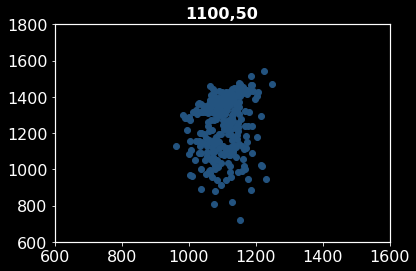

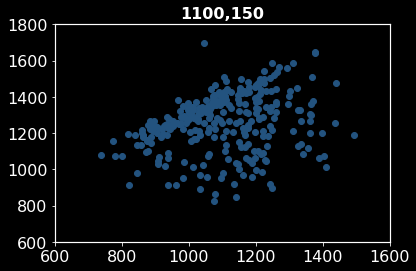

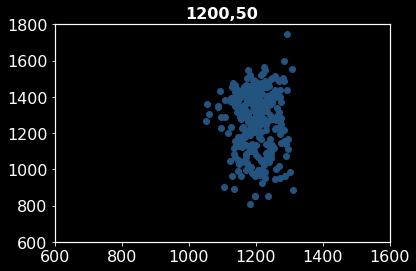

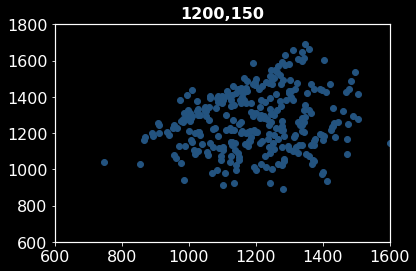

In [ ]:
for j in range(num_blocks):
    fig, ax = plt.subplots()
    ax.scatter(all_agent_task_decision_times_each_condition[j,:],all_player_task_decision_times_each_condition[j,:])
    ax.set_xlim(600,1600)
    ax.set_ylim(600,1800)
    ax.set_title(trial_block_titles[j])



Agent-Player Decision Time and Wins

In [ ]:
perc_player_wins

array([[47.5 , 55.  , 51.25, 45.  , 46.25, 50.  ],
       [88.75, 65.  , 47.5 , 55.  , 31.25, 52.5 ],
       [96.25, 80.  , 73.75, 63.75, 38.75, 45.  ],
       [82.5 , 85.  , 58.75, 61.25, 50.  , 42.5 ]])

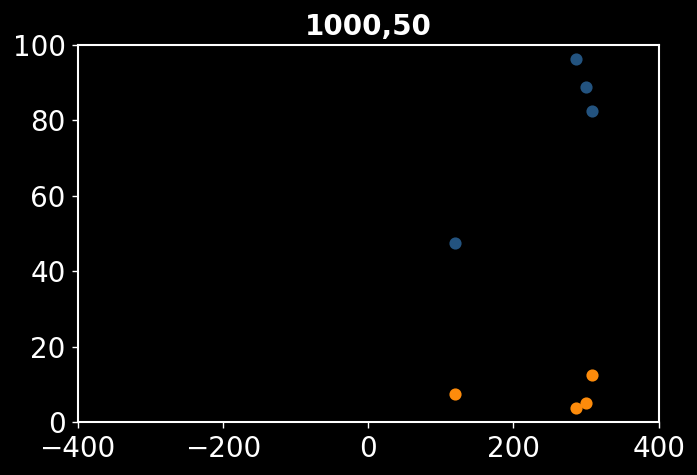

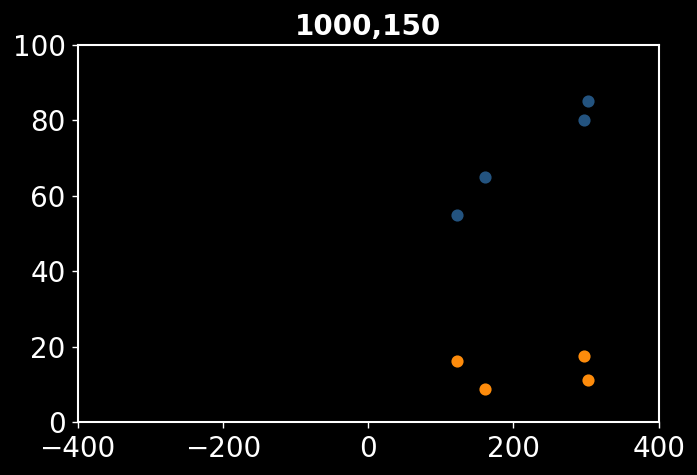

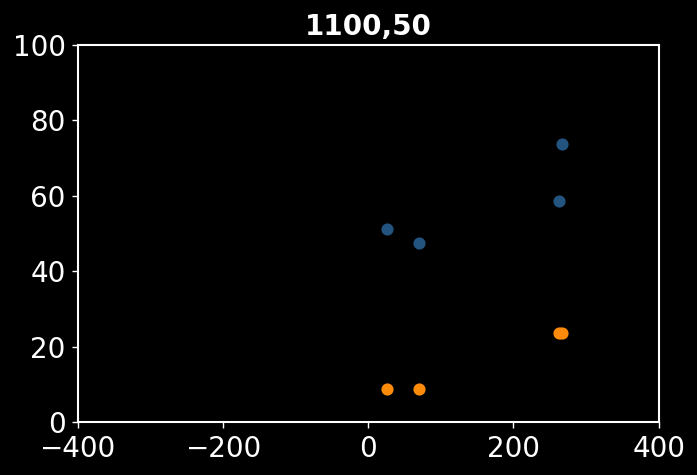

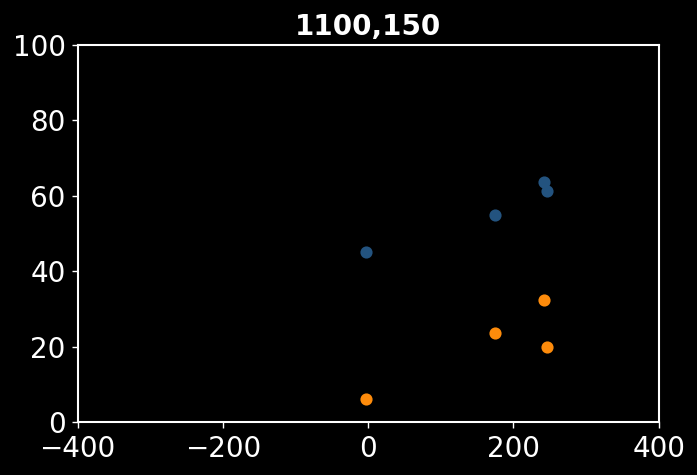

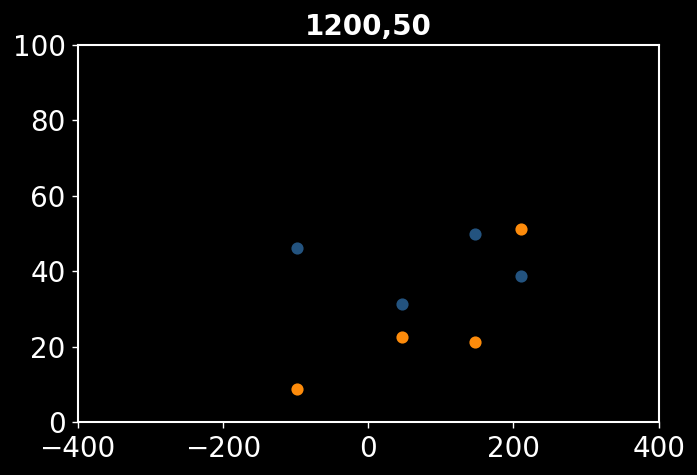

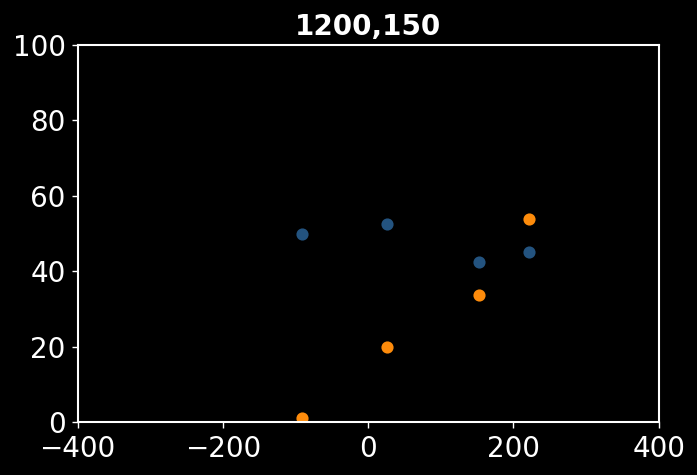

In [ ]:
diff = player_mean_decision_time - agent_mean_decision_time
for j in range(num_blocks):
    fig, ax = plt.subplots(dpi = 125)
    ax.set_xlim(-400,400)
    ax.set_ylim(0,100)
    ax.scatter(diff[:,j],perc_player_wins[:,j], label = 'Wins', linestyle = '-')
    ax.scatter(diff[:,j], perc_player_indecisions[:,j], label ='Indecisions')
    #ax.plot((diff[:,j],diff[:,j]), (perc_player_wins[:,j], perc_player_indecisions[:,j]), c= 'grey')
    ax.set_title(trial_block_titles[j])